# Задача 1. Разведочный анализ

Подключим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

Рассмотрим датасет IQ в разных странах https://www.kaggle.com/datasets/mexwell/global-iq-1950-2050

Описание датасета:

**name** $-$ Название страны

**population** $-$ Население на 2003 год

**population_growth_rate** $-$ Прирост населения за год

**lifexp** $-$ Ожидаемая продолжительность жизни

**fertility** $-$ Коэффициент рождаемости

**median_age** $-$ Средний возраст

**lit_t** $-$ Грамотность населения

**lit_m** $-$ Грамотность среди мужчин

**lit_f** $-$ Грамотность среди женщин

**im_t** $-$ Младенческая смертность

**im_m** $-$ Младенческая смертность у мальчиков

**im_f** $-$ Младенческая смертность у девочек

**gdp** $-$ ВВП по ППС

**gdp_growth_rate** $-$ Годовой темп роста ВВП

**gdp_per_capita** $-$ ВВП на душу населения

**unemp** $-$ Уровень безработицы

**aid** $-$ Полученная (+) / оказанная (-) иностранная помощь

**military** $-$ Военные расходы

**debt** $-$ Внешний долг

**inflate** $-$ Уровень инфляции

**iq** $-$ Средний IQ (с +, если измерили, с -, если оценили)

**gini** $-$ коэффициент Джини

**lat** $-$ Широта

**lon** $-$ Долгота

**area_t** $-$ Площадь

**area_l** $-$ Площадь суши

**area_w** $-$ Площадь воды

**domain** $-$ Домен

**region** $-$ Географический регион

**FH-pr** $-$ Индекс политических прав (1-7) (От лучшего к худшему)

**FH-cl** $-$ Индекс гражданских свобод (1-7) (От лучшего к худшему)

**FH-free** $-$ Общий уровень свободы

**EF-score** $-$ Индекс экономической свободы (1-5) (1 лучший, 5 худщий)

**EF-category** $-$ Группа экономической свободы

**EF-trade** $-$ Торговая политика (1-5)

**EF-fiscal** $-$ Фискальное бремя (1-5)

**EF-intervention** $-$ Государственное вмешательство (1-5)

**EF-monetary** $-$ Монетарная политика (1-5)

**EF-investment** $-$ Иностранные инвестиции (1-5)

**EF-banking** $-$ Банки и финансы (1-5)

**EF-wages** $-$ Зарплаты и цены (1-5)

**EF-property** $-$ Права собственности (1-5)

**EF-regulation** $-$ Регулирование (1-5)

**EF-informal** $-$ Неформальный сектор (1-5)

**P-1950** — **P-2050** $-$ Население в 1950 - 2050 гг

Будем предсказывать целевой признак **IQ** по нецелевым признакам

In [ ]:
df = pd.read_csv('sample_data/cfacts.csv', sep=';', on_bad_lines='warn', encoding='utf-8')

NameError: name 'pd' is not defined

In [ ]:
len(df)

268

In [ ]:
df.head()

,name,population,population_growth_rate,lifexp,fertility,median_age,lit_t,lit_m,lit_f,im_t,...,P-2041,P-2042,P-2043,P-2044,P-2045,P-2046,P-2047,P-2048,P-2049,P-2050
0,Afghanistan,28717213,3.38,46.97,5.64,18.9,36.0,51.0,21.0,142.48,...,-59648038.0,-60506288.0,-61361239.0,-62211836.0,-63057019.0,-63897964.0,-64736049.0,-65570407.0,-66400198.0,-67224578.0
1,Albania,3582205,1.03,72.37,2.22,26.5,86.5,93.3,79.5,37.28,...,-4018984.0,-4020092.0,-4020949.0,-4021532.0,-4021810.0,-4021735.0,-4021246.0,-4020302.0,-4018875.0,-4016945.0
2,Algeria,32818500,1.65,70.54,2.55,22.5,70.0,78.8,61.0,37.74,...,-50385471.0,-50691570.0,-50987677.0,-51273527.0,-51548907.0,-51813311.0,-52066257.0,-52307518.0,-52536846.0,-52754132.0
3,American Samoa,70260,2.22,75.75,3.30,21.6,97.0,98.0,97.0,9.82,...,41823.0,41083.0,40343.0,39605.0,-38865.0,38122.0,37376.0,36627.0,35877.0,-35129.0
4,Andorra,69150,1.06,83.49,1.27,39.1,100.0,NaN,NaN,4.06,...,-74795.0,-74279.0,-73730.0,-73149.0,-72539.0,-71902.0,-71240.0,-70555.0,-69851.0,-69129.0


Узнаем количество пропущенных значений

In [ ]:
nullseries = df.isnull().sum()
print(nullseries[nullseries > 0].to_string())

population                 21
population_growth_rate     35
lifexp                     33
fertility                  43
median_age                 33
lit_t                      55
lit_m                      80
lit_f                      80
im_t                       42
im_m                       42
im_f                       42
gdp                        38
gdp_growth_rate            56
gdp_per_capita             38
unemp                      49
aid                        76
military                   99
debt                       72
inflate                    18
iq                         83
gini                      156
lat                         2
lon                         2
area_t                      3
area_l                     11
area_w                      9
domain                     32
region                      1
FH-pr                      73
FH-cl                      73
FH-free                    73
EF-score                  115
EF-category               115
EF-trade  

Выведем страны с отсутствующей популяцией

In [ ]:
df[df['population'].isnull()]

,name,population,population_growth_rate,lifexp,fertility,median_age,lit_t,lit_m,lit_f,im_t,...,P-2041,P-2042,P-2043,P-2044,P-2045,P-2046,P-2047,P-2048,P-2049,P-2050
7,Antarctica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Arctic Ocean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Ashmore and Cartier Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,British Indian Ocean Territory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Coral Sea Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,Europa Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,French Southern and Antarctic Lands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,Glorioso Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,Indian Ocean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Видим пустые строки, удалим их

In [ ]:
df.dropna(subset=['population'], inplace=True)

Проанализируем столбец population

In [ ]:
df['population'].describe()

,population
count,247
unique,238
top,uninhabited
freq,10


Видим 10 необитаемых территорий, удалим их

In [ ]:
df.drop(df[df['population'] == 'uninhabited'].index, inplace=True)

Посмотрим территории с неуказанным приростом населения

In [ ]:
df[df['population_growth_rate'].isnull()]

,name,population,population_growth_rate,lifexp,fertility,median_age,lit_t,lit_m,lit_f,im_t,...,P-2041,P-2042,P-2043,P-2044,P-2045,P-2046,P-2047,P-2048,P-2049,P-2050
58,Cook Islands,21008,NaN,2003.0,NaN,2003.0,95.0,NaN,NaN,NaN,...,24768.0,24792.0,24814.0,24834.0,-24853.0,24871.0,24888.0,24903.0,24917.0,-24930.0
195,Pitcairn Islands,47,NaN,2003.0,NaN,2003.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,Wallis and Futuna,15734,NaN,2003.0,NaN,2003.0,50.0,50.0,50.0,NaN,...,-19867.0,-19936.0,-20004.0,-20070.0,-20135.0,-20198.0,-20259.0,-20319.0,-20378.0,-20434.0
263,Western Sahara,261794,NaN,2003.0,NaN,2003.0,NaN,NaN,NaN,NaN,...,-497795.0,-505590.0,-513504.0,-521540.0,-529700.0,-537986.0,-546400.0,-554944.0,-563621.0,-572433.0


Видим продолжительность жизни 2003. Посмотрим все такие страны

In [ ]:
df[df['lifexp'] == 2003]

,name,population,population_growth_rate,lifexp,fertility,median_age,lit_t,lit_m,lit_f,im_t,...,P-2041,P-2042,P-2043,P-2044,P-2045,P-2046,P-2047,P-2048,P-2049,P-2050
51,Christmas Island,433,-9.00,2003.0,NaN,2003.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,Cocos (Keeling) Islands,630,0.00,2003.0,NaN,2003.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,Cook Islands,21008,NaN,2003.0,NaN,2003.0,95.0,NaN,NaN,NaN,...,24768.0,24792.0,24814.0,24834.0,-24853.0,24871.0,24888.0,24903.0,24917.0,-24930.0
180,Niue,2145,0.01,2003.0,NaN,2003.0,95.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,Norfolk Island,1853,0.01,2003.0,NaN,2003.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,Pitcairn Islands,47,NaN,2003.0,NaN,2003.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,Svalbard,2811,-0.02,2003.0,NaN,2003.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,Wallis and Futuna,15734,NaN,2003.0,NaN,2003.0,50.0,50.0,50.0,NaN,...,-19867.0,-19936.0,-20004.0,-20070.0,-20135.0,-20198.0,-20259.0,-20319.0,-20378.0,-20434.0
263,Western Sahara,261794,NaN,2003.0,NaN,2003.0,NaN,NaN,NaN,NaN,...,-497795.0,-505590.0,-513504.0,-521540.0,-529700.0,-537986.0,-546400.0,-554944.0,-563621.0,-572433.0


Удалим их

In [ ]:
df.drop(df[df['lifexp'] == 2003].index, inplace=True)

Проанализируем продолжительность жизни, видим, что больше выбросов нет

In [ ]:
df['lifexp'].describe()

,lifexp
count,226.000000
mean,66.969336
std,12.089209
min,31.300000
25%,61.770000
50%,70.705000
75%,76.302500
max,83.490000


Добавим категориальный признак measured, чтобы избавиться от отрицательных значений IQ

In [ ]:
df['measured'] = np.nan
df.loc[df['iq'] > 0, 'measured'] = 'Yes'
df.loc[df['iq'] < 0, 'measured'] = 'No'
df["measured"] = df["measured"].astype("category")
df.head()

,name,population,population_growth_rate,lifexp,fertility,median_age,lit_t,lit_m,lit_f,im_t,...,P-2042,P-2043,P-2044,P-2045,P-2046,P-2047,P-2048,P-2049,P-2050,measured
0,Afghanistan,28717213,3.38,46.97,5.64,18.9,36.0,51.0,21.0,142.48,...,-60506288.0,-61361239.0,-62211836.0,-63057019.0,-63897964.0,-64736049.0,-65570407.0,-66400198.0,-67224578.0,No
1,Albania,3582205,1.03,72.37,2.22,26.5,86.5,93.3,79.5,37.28,...,-4020092.0,-4020949.0,-4021532.0,-4021810.0,-4021735.0,-4021246.0,-4020302.0,-4018875.0,-4016945.0,No
2,Algeria,32818500,1.65,70.54,2.55,22.5,70.0,78.8,61.0,37.74,...,-50691570.0,-50987677.0,-51273527.0,-51548907.0,-51813311.0,-52066257.0,-52307518.0,-52536846.0,-52754132.0,No
3,American Samoa,70260,2.22,75.75,3.30,21.6,97.0,98.0,97.0,9.82,...,41083.0,40343.0,39605.0,-38865.0,38122.0,37376.0,36627.0,35877.0,-35129.0,NaN
4,Andorra,69150,1.06,83.49,1.27,39.1,100.0,NaN,NaN,4.06,...,-74279.0,-73730.0,-73149.0,-72539.0,-71902.0,-71240.0,-70555.0,-69851.0,-69129.0,NaN


Уберём минусы из столбца с IQ

In [ ]:
df['iq'] = abs(df['iq'])

Сравним количество точных и оценочных значений IQ

<Axes: xlabel='measured', ylabel='count'>

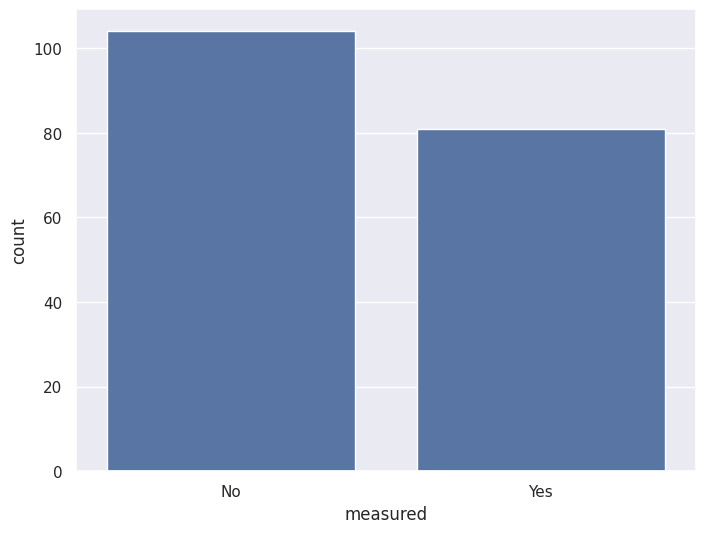

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.countplot(data=df, x='measured')

Посмотрим распределение точных и приблизительных значений IQ

<Axes: xlabel='iq', ylabel='Count'>

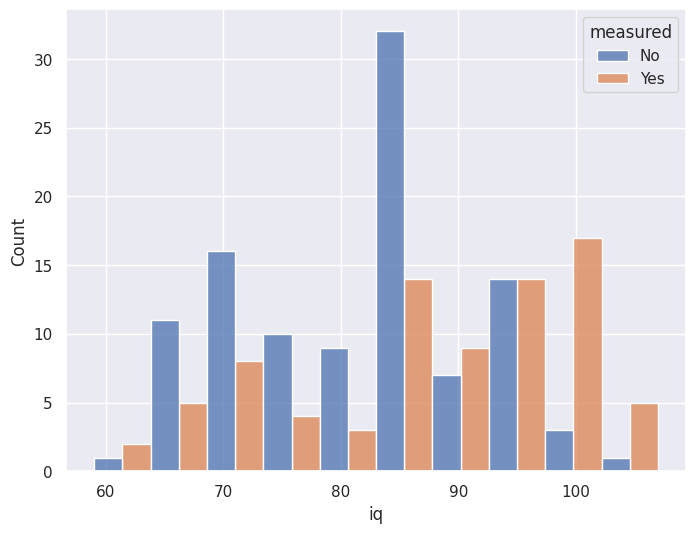

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.histplot(data=df, x='iq', hue='measured', binwidth=5, multiple="dodge")

Посмотрим распределение IQ в целом

<Axes: xlabel='iq', ylabel='Count'>

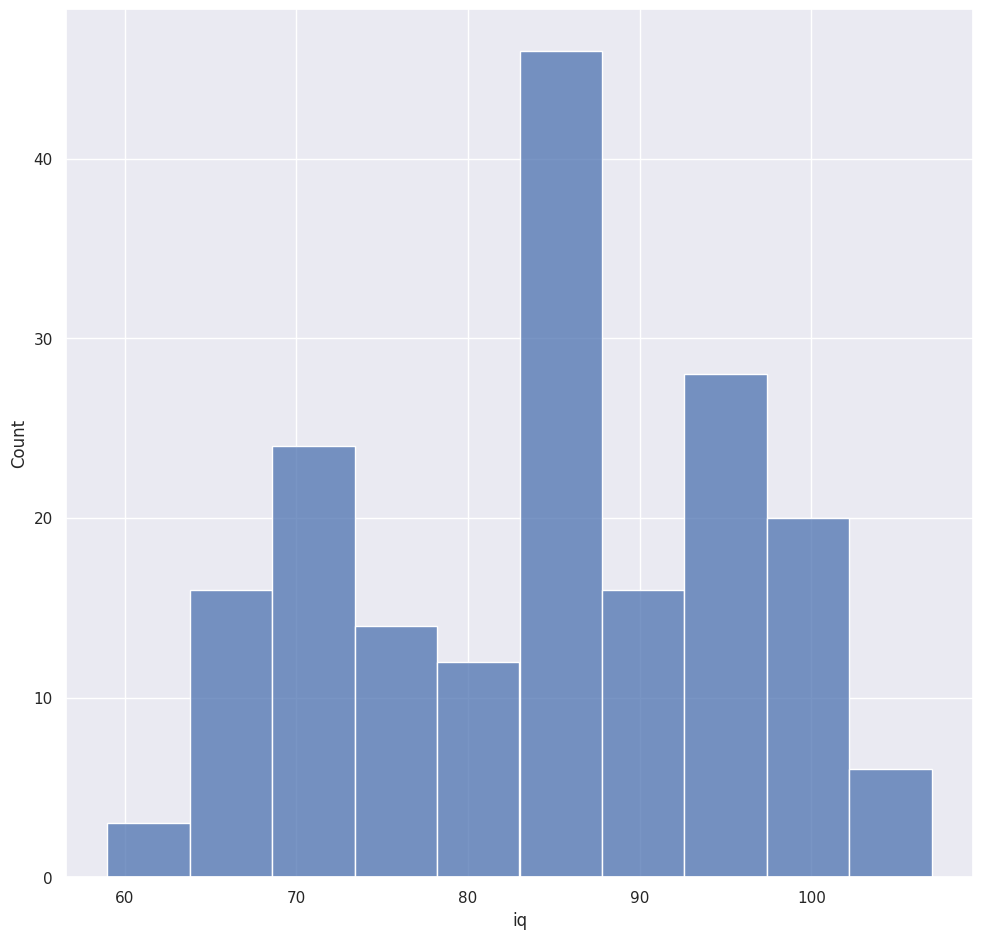

In [ ]:
sns.histplot(data=df, x='iq', binwidth=5)

Посчитаем страны по регионам

<Axes: xlabel='count', ylabel='region'>

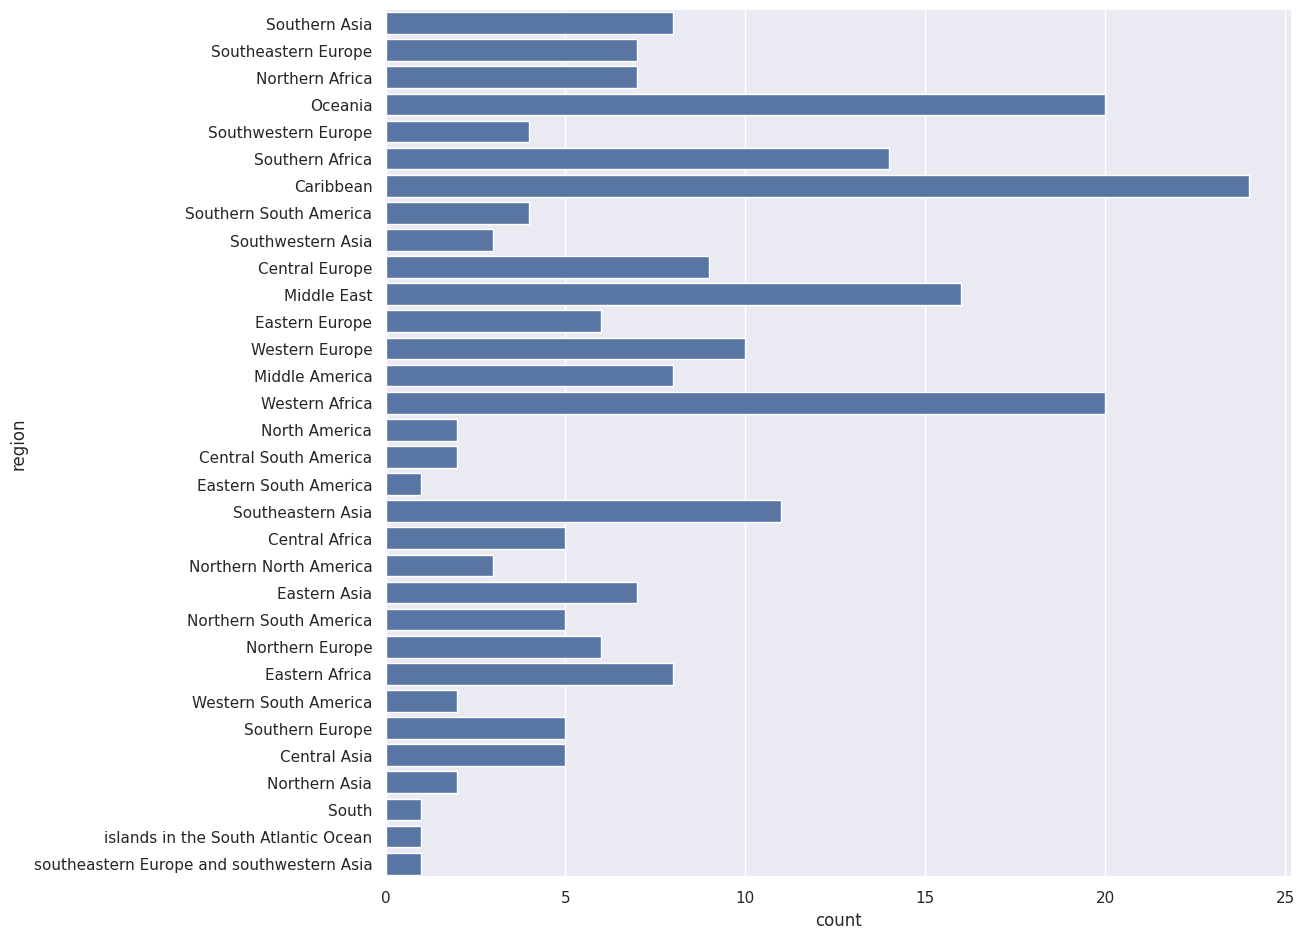

In [ ]:
sns.countplot(data=df, y='region')

Укрупним регионы

In [ ]:
df[df['region'] == 'Western South America']

,name,population,population_growth_rate,lifexp,fertility,median_age,lit_t,lit_m,lit_f,im_t,...,P-2042,P-2043,P-2044,P-2045,P-2046,P-2047,P-2048,P-2049,P-2050,measured
71,Ecuador,13710234,1.91,71.89,2.99,22.5,92.5,94.0,91.0,31.97,...,-22523896.0,-22687018.0,-22845944.0,-23000657.0,-23151227.0,-23297706.0,-23440058.0,-23578260.0,-23712302.0,Yes
193,Peru,28409897,1.61,70.88,2.81,23.5,90.9,95.2,86.8,36.97,...,-42695139.0,-42932550.0,-43162487.0,-43385094.0,-43600660.0,-43809293.0,-44010910.0,-44205531.0,-44393210.0,Yes


In [ ]:
df[df['region'] == 'Eastern South America']

,name,population,population_growth_rate,lifexp,fertility,median_age,lit_t,lit_m,lit_f,im_t,...,P-2042,P-2043,P-2044,P-2045,P-2046,P-2047,P-2048,P-2049,P-2050,measured
34,Brazil,182032604,1.15,71.13,2.01,27.0,86.4,86.1,86.6,31.74,...,-228882966.0,-229012959.0,-229087462.0,-229108541.0,-229076764.0,-228991468.0,-228853311.0,-228663836.0,-228426737.0,Yes


In [ ]:
df[df['region'] == 'Central South America']

,name,population,population_growth_rate,lifexp,fertility,median_age,lit_t,lit_m,lit_f,im_t,...,P-2042,P-2043,P-2044,P-2045,P-2046,P-2047,P-2048,P-2049,P-2050,measured
30,Bolivia,8586443,1.63,64.78,3.23,20.8,87.2,93.1,81.6,56.05,...,-13143707.0,-13228550.0,-13311629.0,-13393008.0,-13472666.0,-13550521.0,-13626523.0,-13700633.0,-13772819.0,No
192,Paraguay,6036900,2.54,74.40,4.02,20.9,94.0,94.9,93.0,27.71,...,-13144917.0,-13333575.0,-13521636.0,-13709014.0,-13895774.0,-14081965.0,-14267457.0,-14452102.0,-14635743.0,No


In [ ]:
df.loc[df['region'] == 'Western South America', 'region'] = 'Central South America'
df.loc[df['region'] == 'Eastern South America', 'region'] = 'Central South America'

In [ ]:
df[df['region'] == 'Southwestern Asia']

,name,population,population_growth_rate,lifexp,fertility,median_age,lit_t,lit_m,lit_f,im_t,...,P-2042,P-2043,P-2044,P-2045,P-2046,P-2047,P-2048,P-2049,P-2050,measured
11,Armenia,3326448,-0.07,66.68,1.56,32.3,98.6,99.4,98.0,40.86,...,-3526244.0,-3522259.0,-3517251.0,-3511342.0,-3504657.0,-3497394.0,-3489776.0,-3481946.0,-3474020.0,No
17,Azerbaijan,7830764,0.44,63.16,2.34,27.1,97.0,99.0,96.0,82.41,...,-10417809.0,-10461129.0,-10500967.0,-10537056.0,-10569302.0,-10597955.0,-10623321.0,-10645595.0,-10664940.0,No
90,Georgia,4934413,-0.52,64.76,1.51,34.8,99.0,100.0,98.0,51.24,...,-4666873.0,-4654989.0,-4642116.0,-4628256.0,-4613417.0,-4597769.0,-4581517.0,-4564747.0,-4547526.0,No


In [ ]:
df[df['region'] == 'southeastern Europe and southwestern Asia']

,name,population,population_growth_rate,lifexp,fertility,median_age,lit_t,lit_m,lit_f,im_t,...,P-2042,P-2043,P-2044,P-2045,P-2046,P-2047,P-2048,P-2049,P-2050,measured
245,Turkey,68109469,1.16,71.8,2.03,26.8,86.5,94.3,78.7,44.2,...,-86632764.0,-86690529.0,-86725841.0,-86739115.0,-86730283.0,-86699025.0,-86645508.0,-86570168.0,-86473786.0,Yes


In [ ]:
df[df['region'] == 'Middle East']

,name,population,population_growth_rate,lifexp,fertility,median_age,lit_t,lit_m,lit_f,im_t,...,P-2042,P-2043,P-2044,P-2045,P-2046,P-2047,P-2048,P-2049,P-2050,measured
19,Bahrain,667238,1.61,73.72,2.71,28.7,89.1,91.9,85.0,18.59,...,-951316.0,-954252.0,-957112.0,-959919.0,-962680.0,-965402.0,-968091.0,-970757.0,-973412.0,No
64,Cyprus,771657,0.56,77.27,1.88,34.2,97.6,98.9,96.3,7.54,...,-852368.0,-851184.0,-849927.0,-848607.0,-847230.0,-845793.0,-844295.0,-842733.0,-841102.0,No
89,Gaza Strip,1274868,3.89,71.40,6.17,15.3,NaN,NaN,NaN,24.15,...,-3707789.0,-3772007.0,-3835838.0,-3899179.0,-3962082.0,-4024607.0,-4086666.0,-4148169.0,-4209026.0,NaN
116,Iran,68278826,1.08,69.35,1.99,22.9,79.4,85.6,73.0,44.17,...,-91546461.0,-91748764.0,-91930181.0,-92088757.0,-92222072.0,-92327674.0,-92403672.0,-92448524.0,-92460873.0,Yes
117,Iraq,24683313,2.78,67.81,4.52,19.0,40.4,55.9,24.4,55.16,...,-51763936.0,-52378096.0,-52981905.0,-53574402.0,-54155302.0,-54724591.0,-55282053.0,-55827509.0,-56360779.0,Yes
119,Israel,6116533,1.39,79.02,2.50,28.9,95.4,97.3,93.6,7.37,...,-8331984.0,-8360369.0,-8387281.0,-8412696.0,-8436604.0,-8458994.0,-8479850.0,-8499141.0,-8516835.0,Yes
127,Jordan,5460265,2.78,77.88,3.00,21.8,91.3,95.9,86.3,18.86,...,-10927815.0,-11041891.0,-11153527.0,-11262840.0,-11369804.0,-11474275.0,-11576220.0,-11675705.0,-11772789.0,No
135,Kuwait,2183161,3.34,76.65,3.08,25.9,83.5,85.1,81.7,10.57,...,-5666688.0,-5756046.0,-5845216.0,-5934157.0,-6022854.0,-6111292.0,-6199447.0,-6287293.0,-6374800.0,No
139,Lebanon,3727703,1.34,72.07,1.98,26.4,87.4,93.1,82.2,26.43,...,-4928987.0,-4937366.0,-4943733.0,-4948089.0,-4950438.0,-4950802.0,-4949247.0,-4945857.0,-4940731.0,Yes
184,Oman,2807125,3.38,72.58,5.94,19.4,75.8,83.1,67.2,21.01,...,-7399341.0,-7518776.0,-7637550.0,-7755510.0,-7872859.0,-7989840.0,-8106375.0,-8222376.0,-8337734.0,No


In [ ]:
df.loc[df['region'] == 'Southwestern Asia', 'region'] = 'Western Asia'
df.loc[df['region'] == 'southeastern Europe and southwestern Asia', 'region'] = 'Western Asia'
df.loc[df['region'] == 'Middle East', 'region'] = 'Western Asia'

In [ ]:
df[df['region'] == 'Northern Asia']

,name,population,population_growth_rate,lifexp,fertility,median_age,lit_t,lit_m,lit_f,im_t,...,P-2042,P-2043,P-2044,P-2045,P-2046,P-2047,P-2048,P-2049,P-2050,measured
165,Mongolia,2712315,1.42,63.81,2.28,23.5,99.1,99.2,99.0,57.16,...,-3991809.0,-4007903.0,-4022758.0,-4036379.0,-4048741.0,-4059847.0,-4069735.0,-4078452.0,-4086025.0,No
202,Russia,144526278,-0.30,67.66,1.33,37.6,99.6,99.7,99.5,19.51,...,-124980846.0,-124184451.0,-123368266.0,-122535662.0,-121688676.0,-120830137.0,-119965090.0,-119098238.0,-118233243.0,Yes


In [ ]:
df.loc[df['name'] == 'Mongolia', 'region'] = 'Eastern Asia'
df.loc[df['name'] == 'Russia', 'region'] = 'Eastern Europe'

In [ ]:
df[df['region'] == 'North America']

,name,population,population_growth_rate,lifexp,fertility,median_age,lit_t,lit_m,lit_f,im_t,...,P-2042,P-2043,P-2044,P-2045,P-2046,P-2047,P-2048,P-2049,P-2050,measured
28,Bermuda,64482,0.72,77.41,1.90,38.7,98.0,98.0,99.0,9.05,...,-68581.0,-68270.0,-67951.0,-67628.0,-67302.0,-66975.0,-66652.0,-66335.0,-66025.0,NaN
253,United States,290342554,0.92,77.14,2.07,35.8,97.0,97.0,97.0,6.75,...,-397745901.0,-400527776.0,-403308225.0,-406089392.0,-408873486.0,-411661861.0,-414456683.0,-417261861.0,-420080587.0,Yes


In [ ]:
df[df['region'] == 'Northern North America']

,name,population,population_growth_rate,lifexp,fertility,median_age,lit_t,lit_m,lit_f,im_t,...,P-2042,P-2043,P-2044,P-2045,P-2046,P-2047,P-2048,P-2049,P-2050,measured
44,Canada,32207113,0.94,79.83,1.61,37.8,97.0,NaN,NaN,4.88,...,-40684693.0,-40782465.0,-40877610.0,-40970661.0,-41062396.0,-41153805.0,-41245505.0,-41337550.0,-41429579.0,Yes
96,Greenland,56385,0.01,69.00,2.43,33.1,NaN,NaN,NaN,16.80,...,-56189.0,-56217.0,-56253.0,-56296.0,-56347.0,-56407.0,-56475.0,-56554.0,-56644.0,NaN
207,Saint Pierre and Miquelon,6976,0.30,78.11,2.07,32.9,99.0,99.0,99.0,7.97,...,6663.0,6627.0,6591.0,-6553.0,6515.0,6476.0,6437.0,6396.0,-6355.0,NaN


In [ ]:
df.loc[df['region'] == 'Northern North America', 'region'] = 'North America'

In [ ]:
df[df['region'] == 'South']

,name,population,population_growth_rate,lifexp,fertility,median_age,lit_t,lit_m,lit_f,im_t,...,P-2042,P-2043,P-2044,P-2045,P-2046,P-2047,P-2048,P-2049,P-2050,measured
168,Mozambique,17479266,0.82,31.3,4.87,19.0,47.8,63.5,32.7,199.0,...,-23397626.0,-23613761.0,-23840028.0,-24075465.0,-24320924.0,-24577161.0,-24842993.0,-25117210.0,-25398605.0,No


In [ ]:
df.loc[df['region'] == 'South', 'region'] = 'Southern Africa'

In [ ]:
df[df['region'] == 'islands in the South Atlantic Ocean']

,name,population,population_growth_rate,lifexp,fertility,median_age,lit_t,lit_m,lit_f,im_t,...,P-2042,P-2043,P-2044,P-2045,P-2046,P-2047,P-2048,P-2049,P-2050,measured
204,Saint Helena,7367,0.67,77.38,1.54,34.2,97.0,97.0,98.0,20.7,...,-7573.0,-7538.0,-7502.0,-7464.0,-7424.0,-7383.0,-7339.0,-7294.0,-7247.0,NaN


Остров с маленьким населением, можно удалить

In [ ]:
df.drop(df[df['region'] == 'islands in the South Atlantic Ocean'].index, inplace=True)

Проверим пропущенные значения

In [ ]:
df[df['region'].isnull()]

,name,population,population_growth_rate,lifexp,fertility,median_age,lit_t,lit_m,lit_f,im_t,...,P-2042,P-2043,P-2044,P-2045,P-2046,P-2047,P-2048,P-2049,P-2050,measured
264,World,6302309691,1.17,63.95,2.65,63.95,77.0,83.0,71.0,51.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Удалим весь мир из таблицы

In [ ]:
df.drop(df[df['name'] == 'World'].index, inplace=True)

Посмотрим средний IQ по регионам

<Axes: xlabel='iq', ylabel='region'>

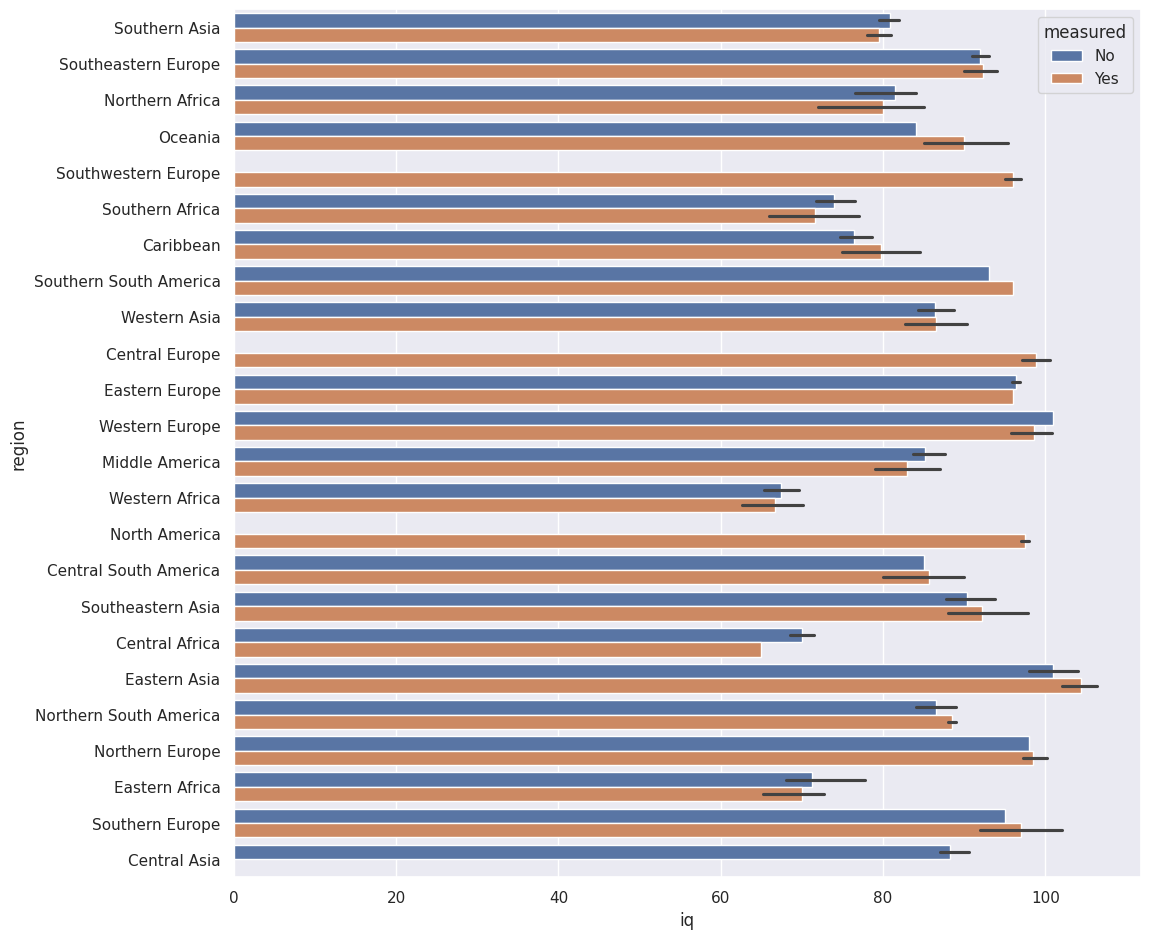

In [ ]:
sns.set_theme(rc={'figure.figsize':(11.7,11.27)})
sns.barplot(data=df, x="iq", y="region", hue="measured")

Посмотрим распределение IQ по регионам

<Axes: xlabel='iq', ylabel='region'>

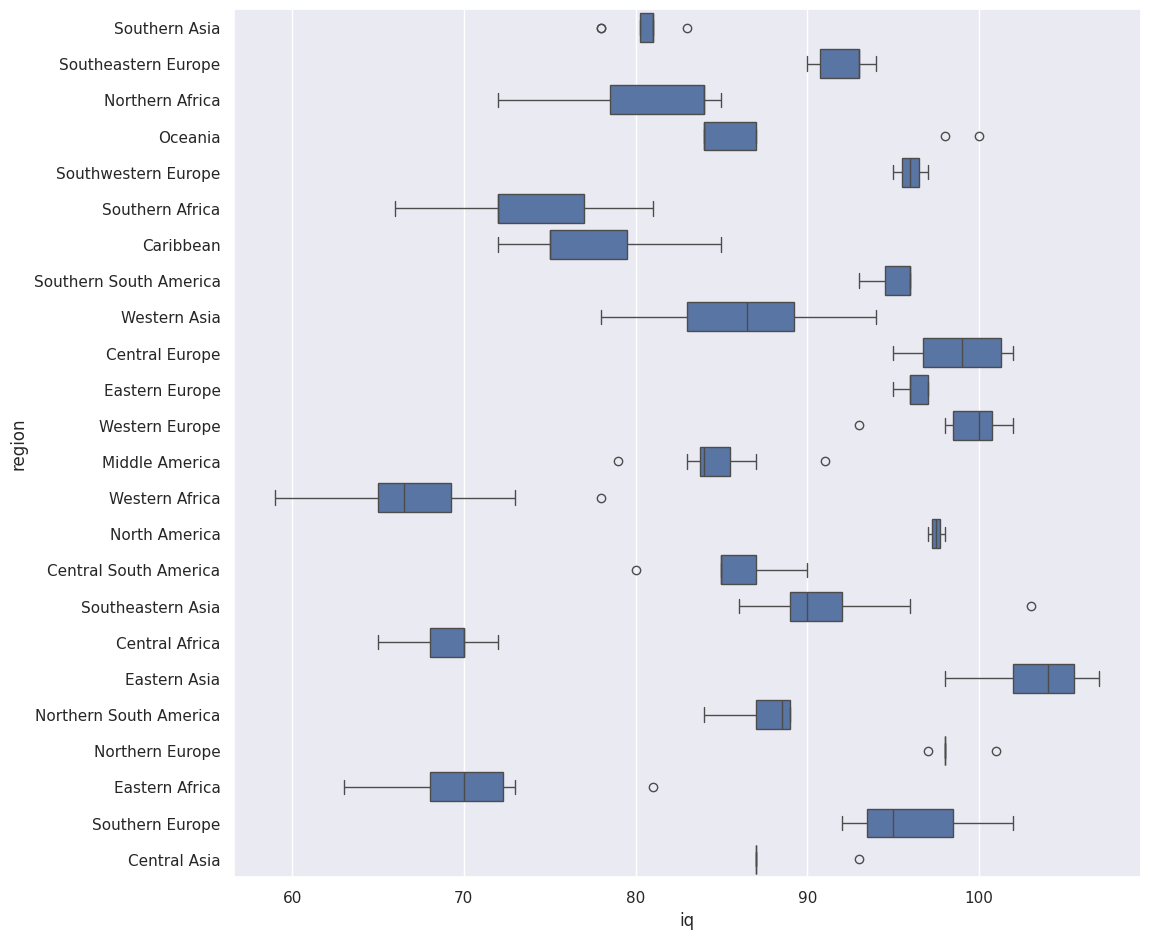

In [ ]:
sns.boxplot(data=df, x="iq", y="region")

*   Cамый высокий IQ в Восточной Азии
*   Самый низкий $-$ в Западной Африке



Посмотрим связь некоторых признаков с IQ

Text(0.5, 1.0, 'IQ vs Infant Mortality')

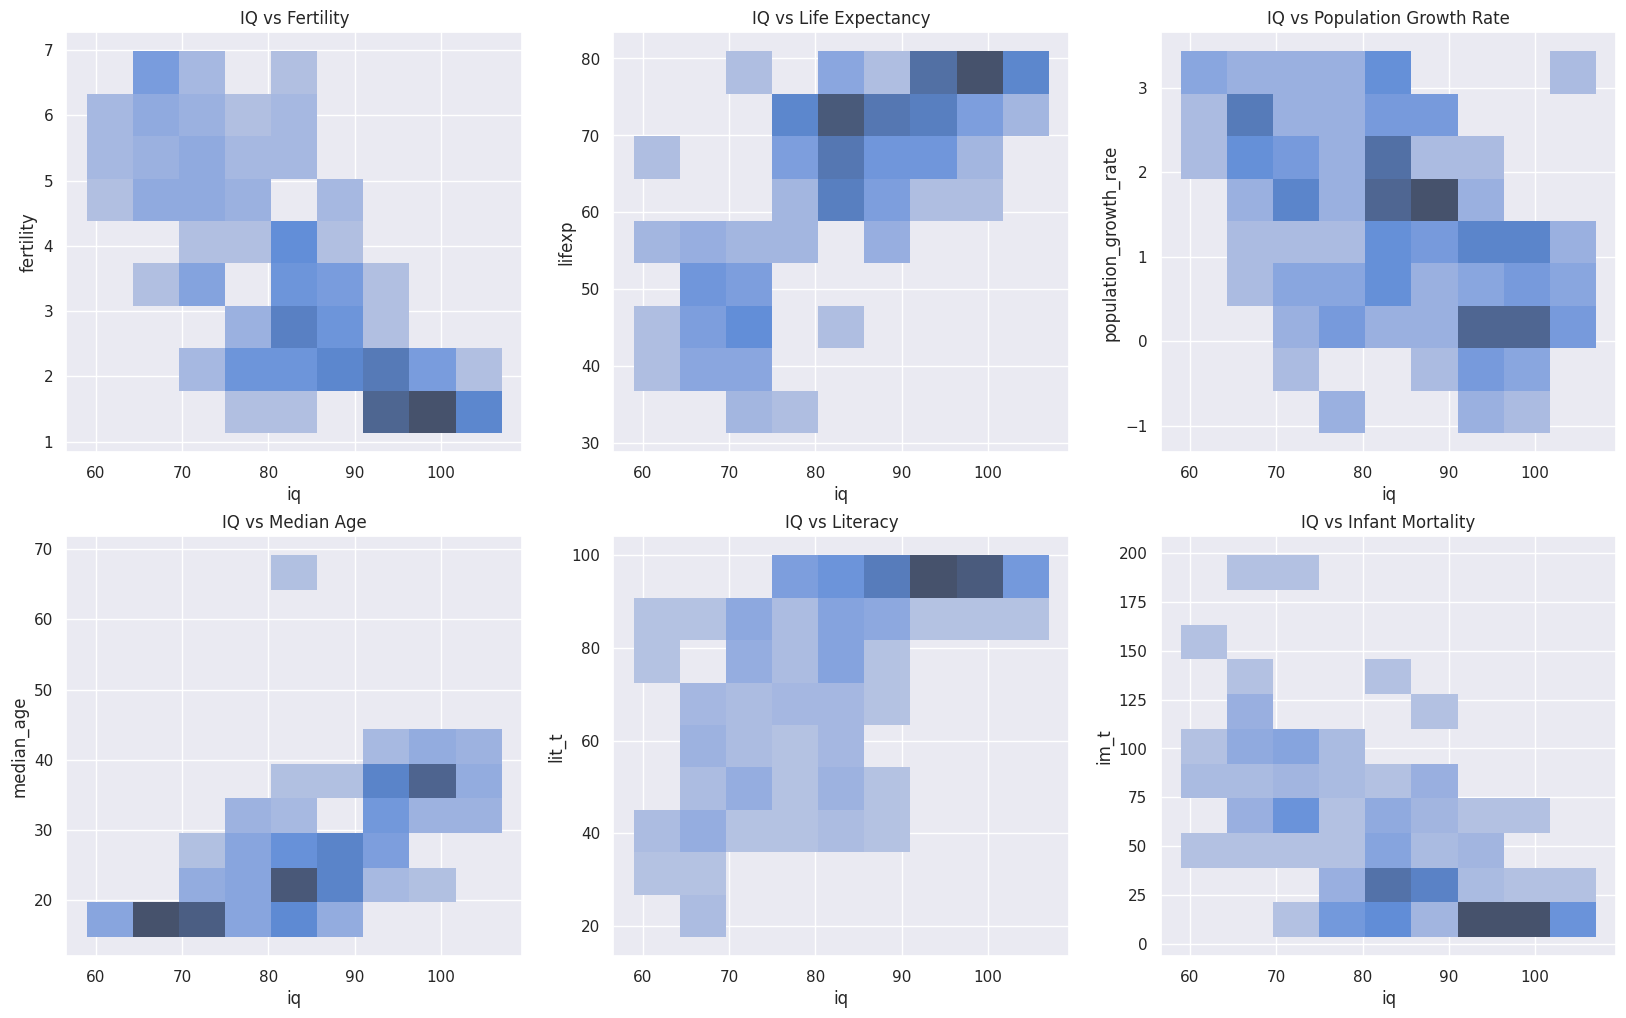

In [ ]:
_, ax = plt.subplots(2, 3, figsize=(20,12))
sns.histplot(data=df, y='fertility', x='iq', ax=ax[0,0])
ax[0,0].set_title('IQ vs Fertility')
sns.histplot(data=df, y='lifexp', x='iq', ax=ax[0,1])
ax[0,1].set_title('IQ vs Life Expectancy')
sns.histplot(data=df, y='population_growth_rate', x='iq', ax=ax[0,2])
ax[0,2].set_title('IQ vs Population Growth Rate')
sns.histplot(data=df, y='median_age', x='iq', ax=ax[1,0])
ax[1,0].set_title('IQ vs Median Age')
sns.histplot(data=df, y='lit_t', x='iq', ax=ax[1,1])
ax[1,1].set_title('IQ vs Literacy')
sns.histplot(data=df, y='im_t', x='iq', ax=ax[1,2])
ax[1,2].set_title('IQ vs Infant Mortality')

*   Странам с высоким IQ свойственна низкая фертильность, с низким $-$ высокая
*   Продолжительность жизни повышается с ростом IQ
*   Для стран с низким IQ характерен высокий прирост населения, с высоким IQ $-$ низкий
*   Средний возраст населения повышается с ростом IQ
*   В странах с высоким IQ очень высокий уровень грамотности, в странах с низким большой разброс
*   В странах с высоким IQ низкий уровень младенческой смертности





Видим выброс среднего возраста, проверим

In [ ]:
df[(df['median_age'] > 60) & (df['iq'].notnull())]

,name,population,population_growth_rate,lifexp,fertility,median_age,lit_t,lit_m,lit_f,im_t,...,P-2042,P-2043,P-2044,P-2045,P-2046,P-2047,P-2048,P-2049,P-2050,measured
161,"Micronesia, Federated States of",108143,0.04,69.13,3.5,69.13,89.0,91.0,88.0,32.39,...,82990.0,81928.0,80858.0,-79781.0,78696.0,77606.0,76508.0,75404.0,-74296.0,No


Тут median_age = lifexp, заменим на среднее значение по региону

In [ ]:
region = df.loc[df['name'] == 'Micronesia, Federated States of', 'region'].values[0]
df.loc[df['name'] == 'Micronesia, Federated States of', 'median_age'] = df[df['region'] == region]['median_age'].mean()

In [ ]:
df[df['name'] == 'Micronesia, Federated States of']

,name,population,population_growth_rate,lifexp,fertility,median_age,lit_t,lit_m,lit_f,im_t,...,P-2042,P-2043,P-2044,P-2045,P-2046,P-2047,P-2048,P-2049,P-2050,measured
161,"Micronesia, Federated States of",108143,0.04,69.13,3.5,28.9365,89.0,91.0,88.0,32.39,...,82990.0,81928.0,80858.0,-79781.0,78696.0,77606.0,76508.0,75404.0,-74296.0,No


Проверим пропущенные значения

In [ ]:
df[df['lifexp'].isnull()]

,name,population,population_growth_rate,lifexp,fertility,median_age,lit_t,lit_m,lit_f,im_t,...,P-2042,P-2043,P-2044,P-2045,P-2046,P-2047,P-2048,P-2049,P-2050,measured
79,Falkland Islands (Islas Malvinas),2967,2.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,Holy See (Vatican City),911,0.01,NaN,NaN,NaN,100.0,NaN,NaN,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Маленькое население, можно удалить из выборки

In [ ]:
df.drop(df[df['lifexp'].isnull()].index, inplace=True)

In [ ]:
df[df['fertility'].isnull()]

,name,population,population_growth_rate,lifexp,fertility,median_age,lit_t,lit_m,lit_f,im_t,...,P-2042,P-2043,P-2044,P-2045,P-2046,P-2047,P-2048,P-2049,P-2050,measured
240,Tokelau,1418,0.01,68.0,NaN,68.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Также удаляем

In [ ]:
df.drop(df[df['fertility'].isnull()].index, inplace=True)

In [ ]:
df[df['lit_t'].isnull()]

,name,population,population_growth_rate,lifexp,fertility,median_age,lit_t,lit_m,lit_f,im_t,...,P-2042,P-2043,P-2044,P-2045,P-2046,P-2047,P-2048,P-2049,P-2050,measured
31,Bosnia and Herzegovina,3989018,0.48,72.29,1.71,35.5,NaN,NaN,NaN,22.70,...,-4036026.0,-4020819.0,-4004913.0,-3988367.0,-3971199.0,-3953413.0,-3935050.0,-3916183.0,-3896902.0,NaN
80,Faroe Islands,46345,0.70,78.90,2.24,35.1,NaN,NaN,NaN,6.52,...,-52991.0,-53015.0,-53035.0,-53051.0,-53063.0,-53069.0,-53069.0,-53062.0,-53050.0,NaN
89,Gaza Strip,1274868,3.89,71.40,6.17,15.3,NaN,NaN,NaN,24.15,...,-3707789.0,-3772007.0,-3835838.0,-3899179.0,-3962082.0,-4024607.0,-4086666.0,-4148169.0,-4209026.0,NaN
96,Greenland,56385,0.01,69.00,2.43,33.1,NaN,NaN,NaN,16.80,...,-56189.0,-56217.0,-56253.0,-56296.0,-56347.0,-56407.0,-56475.0,-56554.0,-56644.0,NaN
101,Guernsey,64818,0.34,80.04,1.37,40.2,NaN,NaN,NaN,4.85,...,-63676.0,-63336.0,-62984.0,-62618.0,-62239.0,-61849.0,-61447.0,-61033.0,-60606.0,NaN
125,Jersey,90156,0.40,78.93,1.57,39.8,NaN,NaN,NaN,5.43,...,-88641.0,-88118.0,-87577.0,-87020.0,-86451.0,-85872.0,-85282.0,-84684.0,-84077.0,NaN
132,Kiribati,98549,2.26,60.93,4.28,19.7,NaN,NaN,NaN,51.26,...,210642.0,213774.0,216885.0,-219972.0,223049.0,226126.0,229202.0,232275.0,-235342.0,No
147,"Macedonia, The Former Yugoslav Republic of",2063122,0.40,74.49,1.75,32.5,NaN,NaN,NaN,12.14,...,-2152107.0,-2147428.0,-2142541.0,-2137410.0,-2132027.0,-2126402.0,-2120543.0,-2114446.0,-2108078.0,No
154,"Man, Isle of",74261,0.53,77.98,1.65,39.1,NaN,NaN,NaN,6.17,...,-82041.0,-81874.0,-81687.0,-81480.0,-81252.0,-81003.0,-80732.0,-80442.0,-80131.0,NaN
159,Mayotte,178437,4.25,60.60,6.07,16.9,NaN,NaN,NaN,65.98,...,-517560.0,-527028.0,-536476.0,-545891.0,-555283.0,-564661.0,-574018.0,-583344.0,-592627.0,NaN


Заменим пропущенный уровень грамотности на средний по региону

In [ ]:
for index, row in df[df['lit_t'].isnull()].iterrows():
  df.at[index, 'lit_t'] = df[df['region'] == row['region']]['lit_t'].mean()

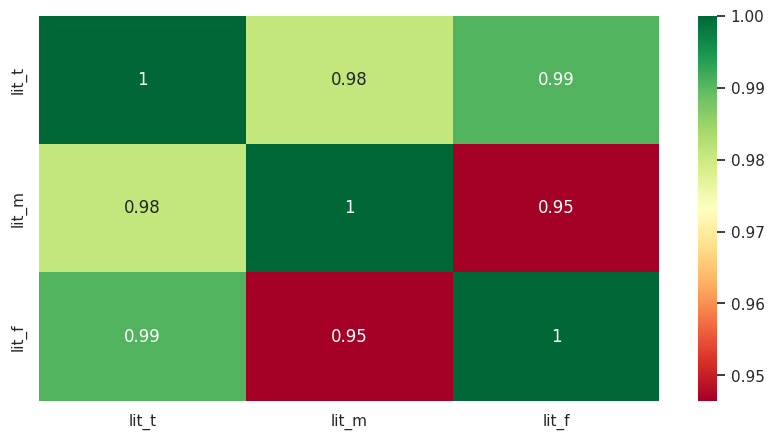

In [ ]:
sns.heatmap(df[['lit_t', 'lit_m', 'lit_f']].corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Видим сильную корреляцию общей грамотности и грамотности по полам, поэтому удалим столбцы, как избыточные

In [ ]:
df.drop(['lit_m', 'lit_f'], axis=1, inplace=True)

То же самое для данных по младенческой смертности

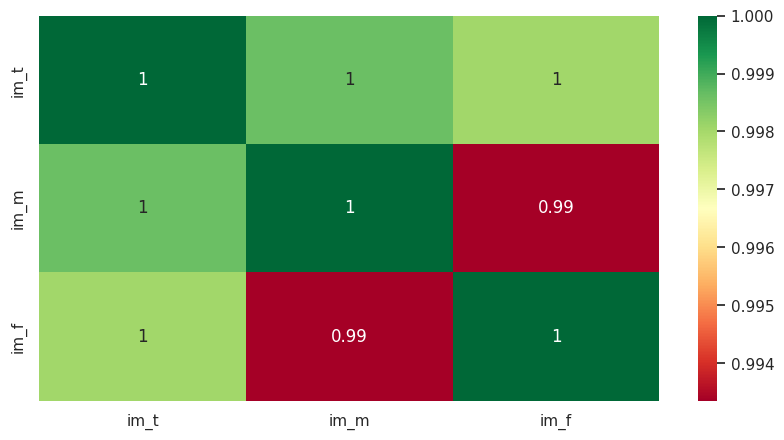

In [ ]:
sns.heatmap(df[['im_t', 'im_m', 'im_f']].corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [ ]:
df.drop(['im_m', 'im_f'], axis=1, inplace=True)

Также можно удалить столбцы с географическими координатами страны и доменным именем

In [ ]:
df.drop(['lat', 'lon', 'area_t', 'area_l', 'area_w', 'domain'], axis=1, inplace=True)

И столбцы с населением за каждый год (нам уже известен годовой прирост)

In [ ]:
df = df[df.columns.drop(list(df.filter(regex='P-')))]

Удалим коэффициент Джини (слишком много пропусков)

In [ ]:
df.drop(['gini'], axis=1, inplace=True)

Проанализируем ВВП

In [ ]:
df['gdp'].describe()

,gdp
count,2.230000e+02
mean,2.207192e+11
std,8.931007e+11
min,1.220000e+07
25%,2.605000e+09
50%,1.569000e+10
75%,1.012950e+11
max,1.045000e+13


Слишком большой разброс, создадим новый категориальный признак

In [ ]:
df['gdp_category'] = pd.qcut(df['gdp'], 5)

In [ ]:
df.groupby(['gdp_category'])['iq'].mean().to_frame().style.background_gradient(cmap='summer_r')

,iq
gdp_category,
"(12199999.999, 1367600000.0]",77.181818
"(1367600000.0, 9221600000.0]",76.137931
"(9221600000.0, 26824000000.0]",82.555556
"(26824000000.0, 152820000000.0]",85.500000
"(152820000000.0, 10450000000000.0]",94.022222




*   IQ повышается с ростом ВВП



In [ ]:
df['gdp_category'] = df['gdp_category'].cat.rename_categories({0, 1, 2, 3, 4})

Text(0.5, 1.0, 'IQ vs GDP Per Capita')

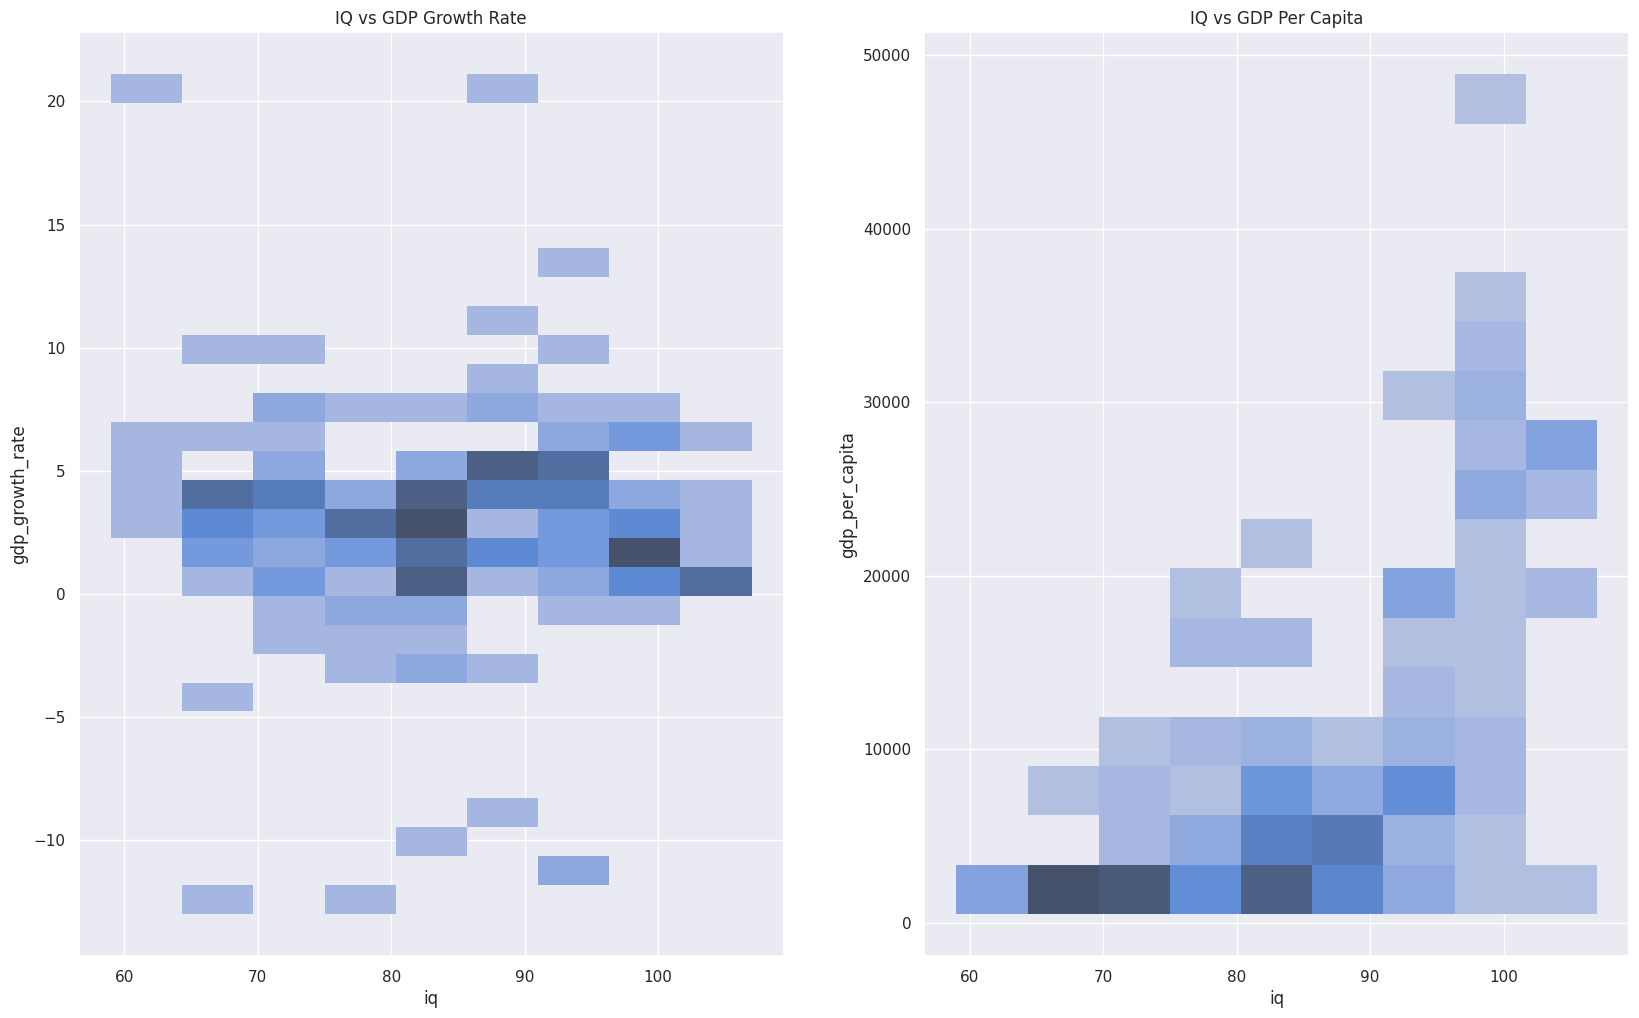

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(20,12))
sns.histplot(data=df, x='iq', y='gdp_growth_rate', ax=ax[0])
ax[0].set_title('IQ vs GDP Growth Rate')
sns.histplot(data=df, x='iq', y='gdp_per_capita', ax=ax[1])
ax[1].set_title('IQ vs GDP Per Capita')



*   Связи между IQ и темпом роста ВВП не видно
*   В странах с большим ВВП на душу населения высокий IQ



In [ ]:
df['aid'].describe()

,aid
count,1.860000e+02
mean,6.205723e+08
std,4.167461e+09
min,-9.100000e+09
25%,2.850000e+07
50%,1.380000e+08
75%,4.487500e+08
max,4.300000e+10


Cоздадим категориальный признак для aid

In [ ]:
df['aid_category'] = pd.qcut(df['aid'], 5)

In [ ]:
df.groupby(['aid_category'])['iq'].mean().to_frame().style.background_gradient(cmap='summer_r')

,iq
aid_category,
"(-9100000000.001, 15000000.0]",92.558824
"(15000000.0, 80000000.0]",79.968750
"(80000000.0, 208700000.0]",81.909091
"(208700000.0, 588000000.0]",78.914286
"(588000000.0, 43000000000.0]",84.187500




*   В странах-донорах IQ выше



In [ ]:
df['aid_category'] = df['aid_category'].cat.rename_categories({0, 1, 2, 3, 4})

In [ ]:
df['military'].describe()

,military
count,1.690000e+02
mean,4.385556e+09
std,2.246486e+10
min,4.000000e+05
25%,4.213000e+07
50%,2.308000e+08
75%,1.497000e+09
max,2.767000e+11


Cоздадим категориальный признак для military

In [ ]:
df['military_category'] = pd.qcut(df['military'], 5)

In [ ]:
df.groupby(['military_category'])['iq'].mean().to_frame().style.background_gradient(cmap='summer_r')

,iq
military_category,
"(399999.999, 35060000.0]",75.258065
"(35060000.0, 125600000.0]",78.647059
"(125600000.0, 555400000.0]",85.000000
"(555400000.0, 2442400000.0]",86.911765
"(2442400000.0, 276700000000.0]",95.647059




*   С ростом военных расходов растёт IQ



In [ ]:
df['military_category'] = df['military_category'].cat.rename_categories({0, 1, 2, 3, 4})

In [ ]:
df['debt'].describe()

,debt
count,1.930000e+02
mean,2.159566e+10
std,7.058717e+10
min,0.000000e+00
25%,6.920000e+08
50%,3.700000e+09
75%,1.370000e+10
max,8.620000e+11


Создадим категориальный признак для debt


In [ ]:
df['debt_category'] = pd.qcut(df['debt'], 5)

In [ ]:
df.groupby(['debt_category'])['iq'].mean().to_frame().style.background_gradient(cmap='summer_r')

,iq
debt_category,
"(-0.001, 314600000.0]",79.391304
"(314600000.0, 2060000000.0]",78.888889
"(2060000000.0, 5940000000.0]",79.473684
"(5940000000.0, 20360000000.0]",86.105263
"(20360000000.0, 862000000000.0]",91.948718




*   В странах с большим внешним долгом высокий IQ



In [ ]:
df['debt_category'] = df['debt_category'].cat.rename_categories({0, 1, 2, 3, 4})

In [ ]:
df['inflate'].describe()

,inflate
count,215
unique,108
top,3
freq,10


Удаляем ошибочное значение

In [ ]:
df.drop(df[df['inflate'] == "02:08.0"].index, inplace=True)

Преобразуем в количественный признак

In [ ]:
df['inflate'] = pd.to_numeric(df['inflate'])

Text(0.5, 1.0, 'IQ vs Inflation Rate')

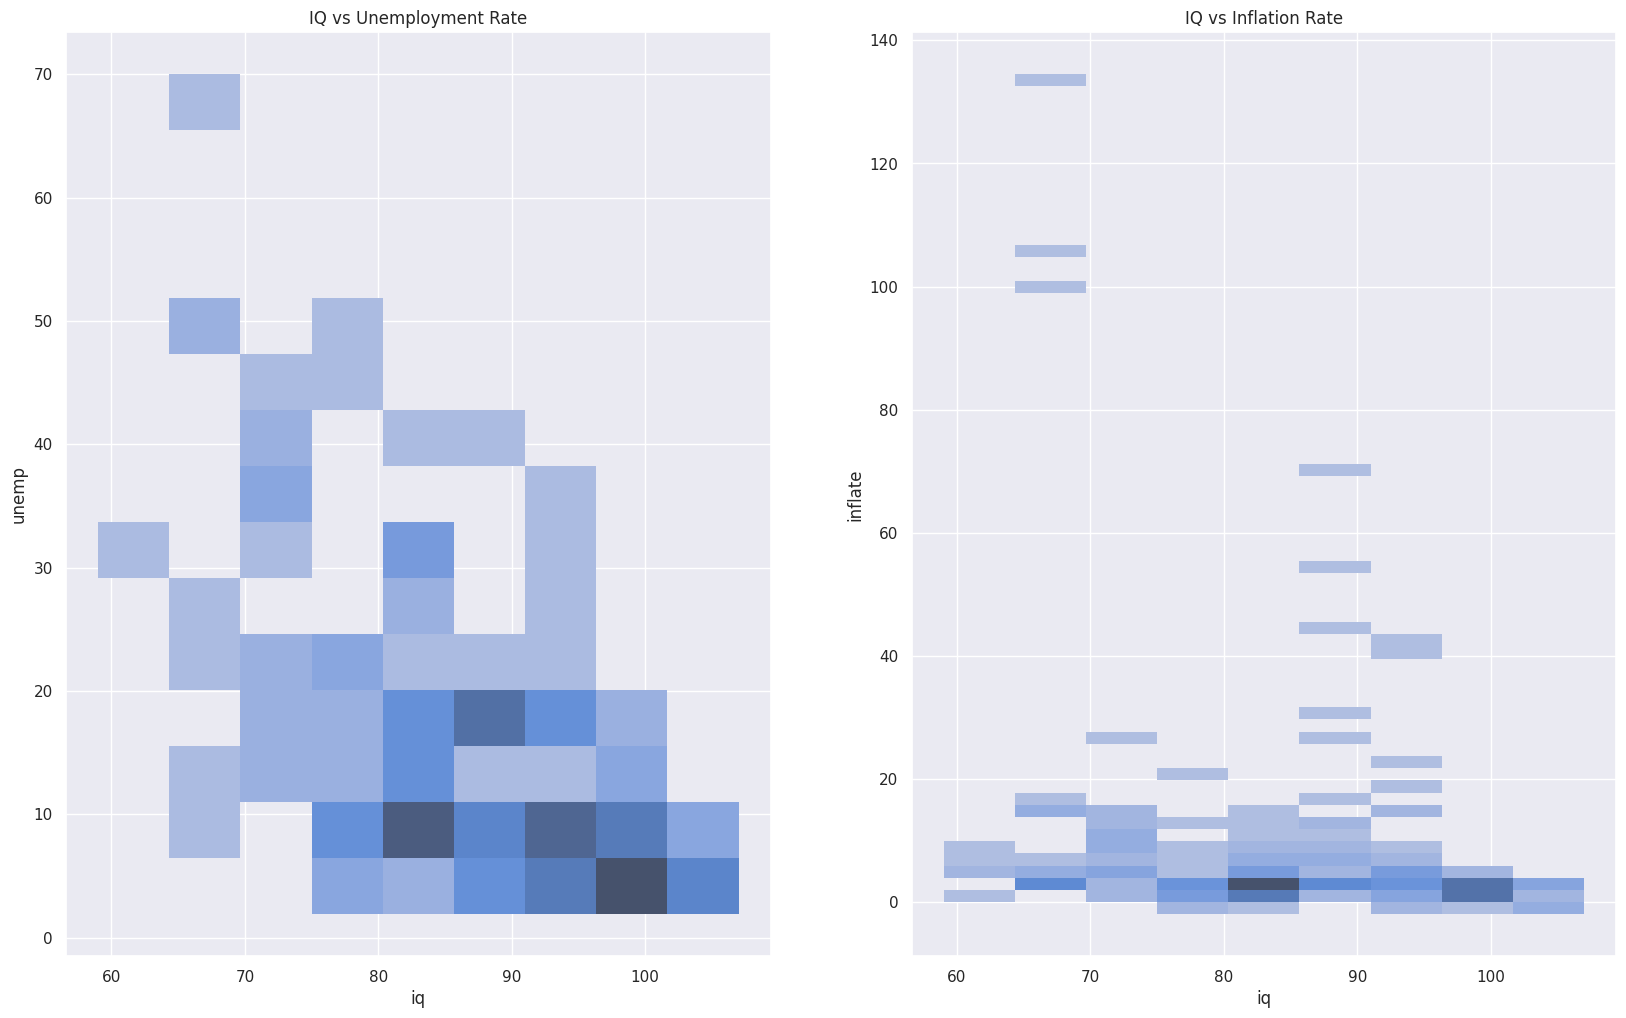

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(20,12))
sns.histplot(data=df, x='iq', y='unemp', ax=ax[0])
ax[0].set_title('IQ vs Unemployment Rate')
sns.histplot(data=df, x='iq', y='inflate', ax=ax[1])
ax[1].set_title('IQ vs Inflation Rate')



*   Для стран с низким IQ характерен высокий уровень безработицы
*   Во всех странах с высоким IQ низкая инфляция



In [ ]:
df[df['gdp_growth_rate'].isnull()]

,name,population,population_growth_rate,lifexp,fertility,median_age,lit_t,im_t,gdp,gdp_growth_rate,...,EF-banking,EF-wages,EF-property,EF-regulation,EF-informal,measured,gdp_category,aid_category,military_category,debt_category
0,Afghanistan,28717213,3.38,46.97,5.64,18.9,36.000000,142.48,1.900000e+10,NaN,...,NaN,NaN,NaN,NaN,NaN,No,2,4,2,NaN
3,American Samoa,70260,2.22,75.75,3.30,21.6,97.000000,9.82,5.000000e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,NaN
84,French Guiana,186917,2.40,76.69,3.09,28.2,83.000000,12.84,2.260000e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1
93,Gibraltar,27776,0.22,79.38,1.65,38.8,80.000000,5.31,5.000000e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
98,Guadeloupe,440189,1.00,77.53,1.92,31.0,90.000000,9.07,3.700000e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
99,Guam,163941,1.89,78.27,3.62,25.2,99.000000,6.46,3.200000e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN
125,Jersey,90156,0.40,78.93,1.57,39.8,98.857143,5.43,2.200000e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
156,Martinique,425966,0.85,78.72,1.79,32.7,97.700000,7.44,4.500000e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0
159,Mayotte,178437,4.25,60.60,6.07,16.9,74.307143,65.98,8.500000e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,2,NaN,NaN
164,Monaco,32130,0.44,79.27,1.76,45.0,99.000000,5.63,8.700000e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


Text(0.5, 1.0, 'Inflation by Region')

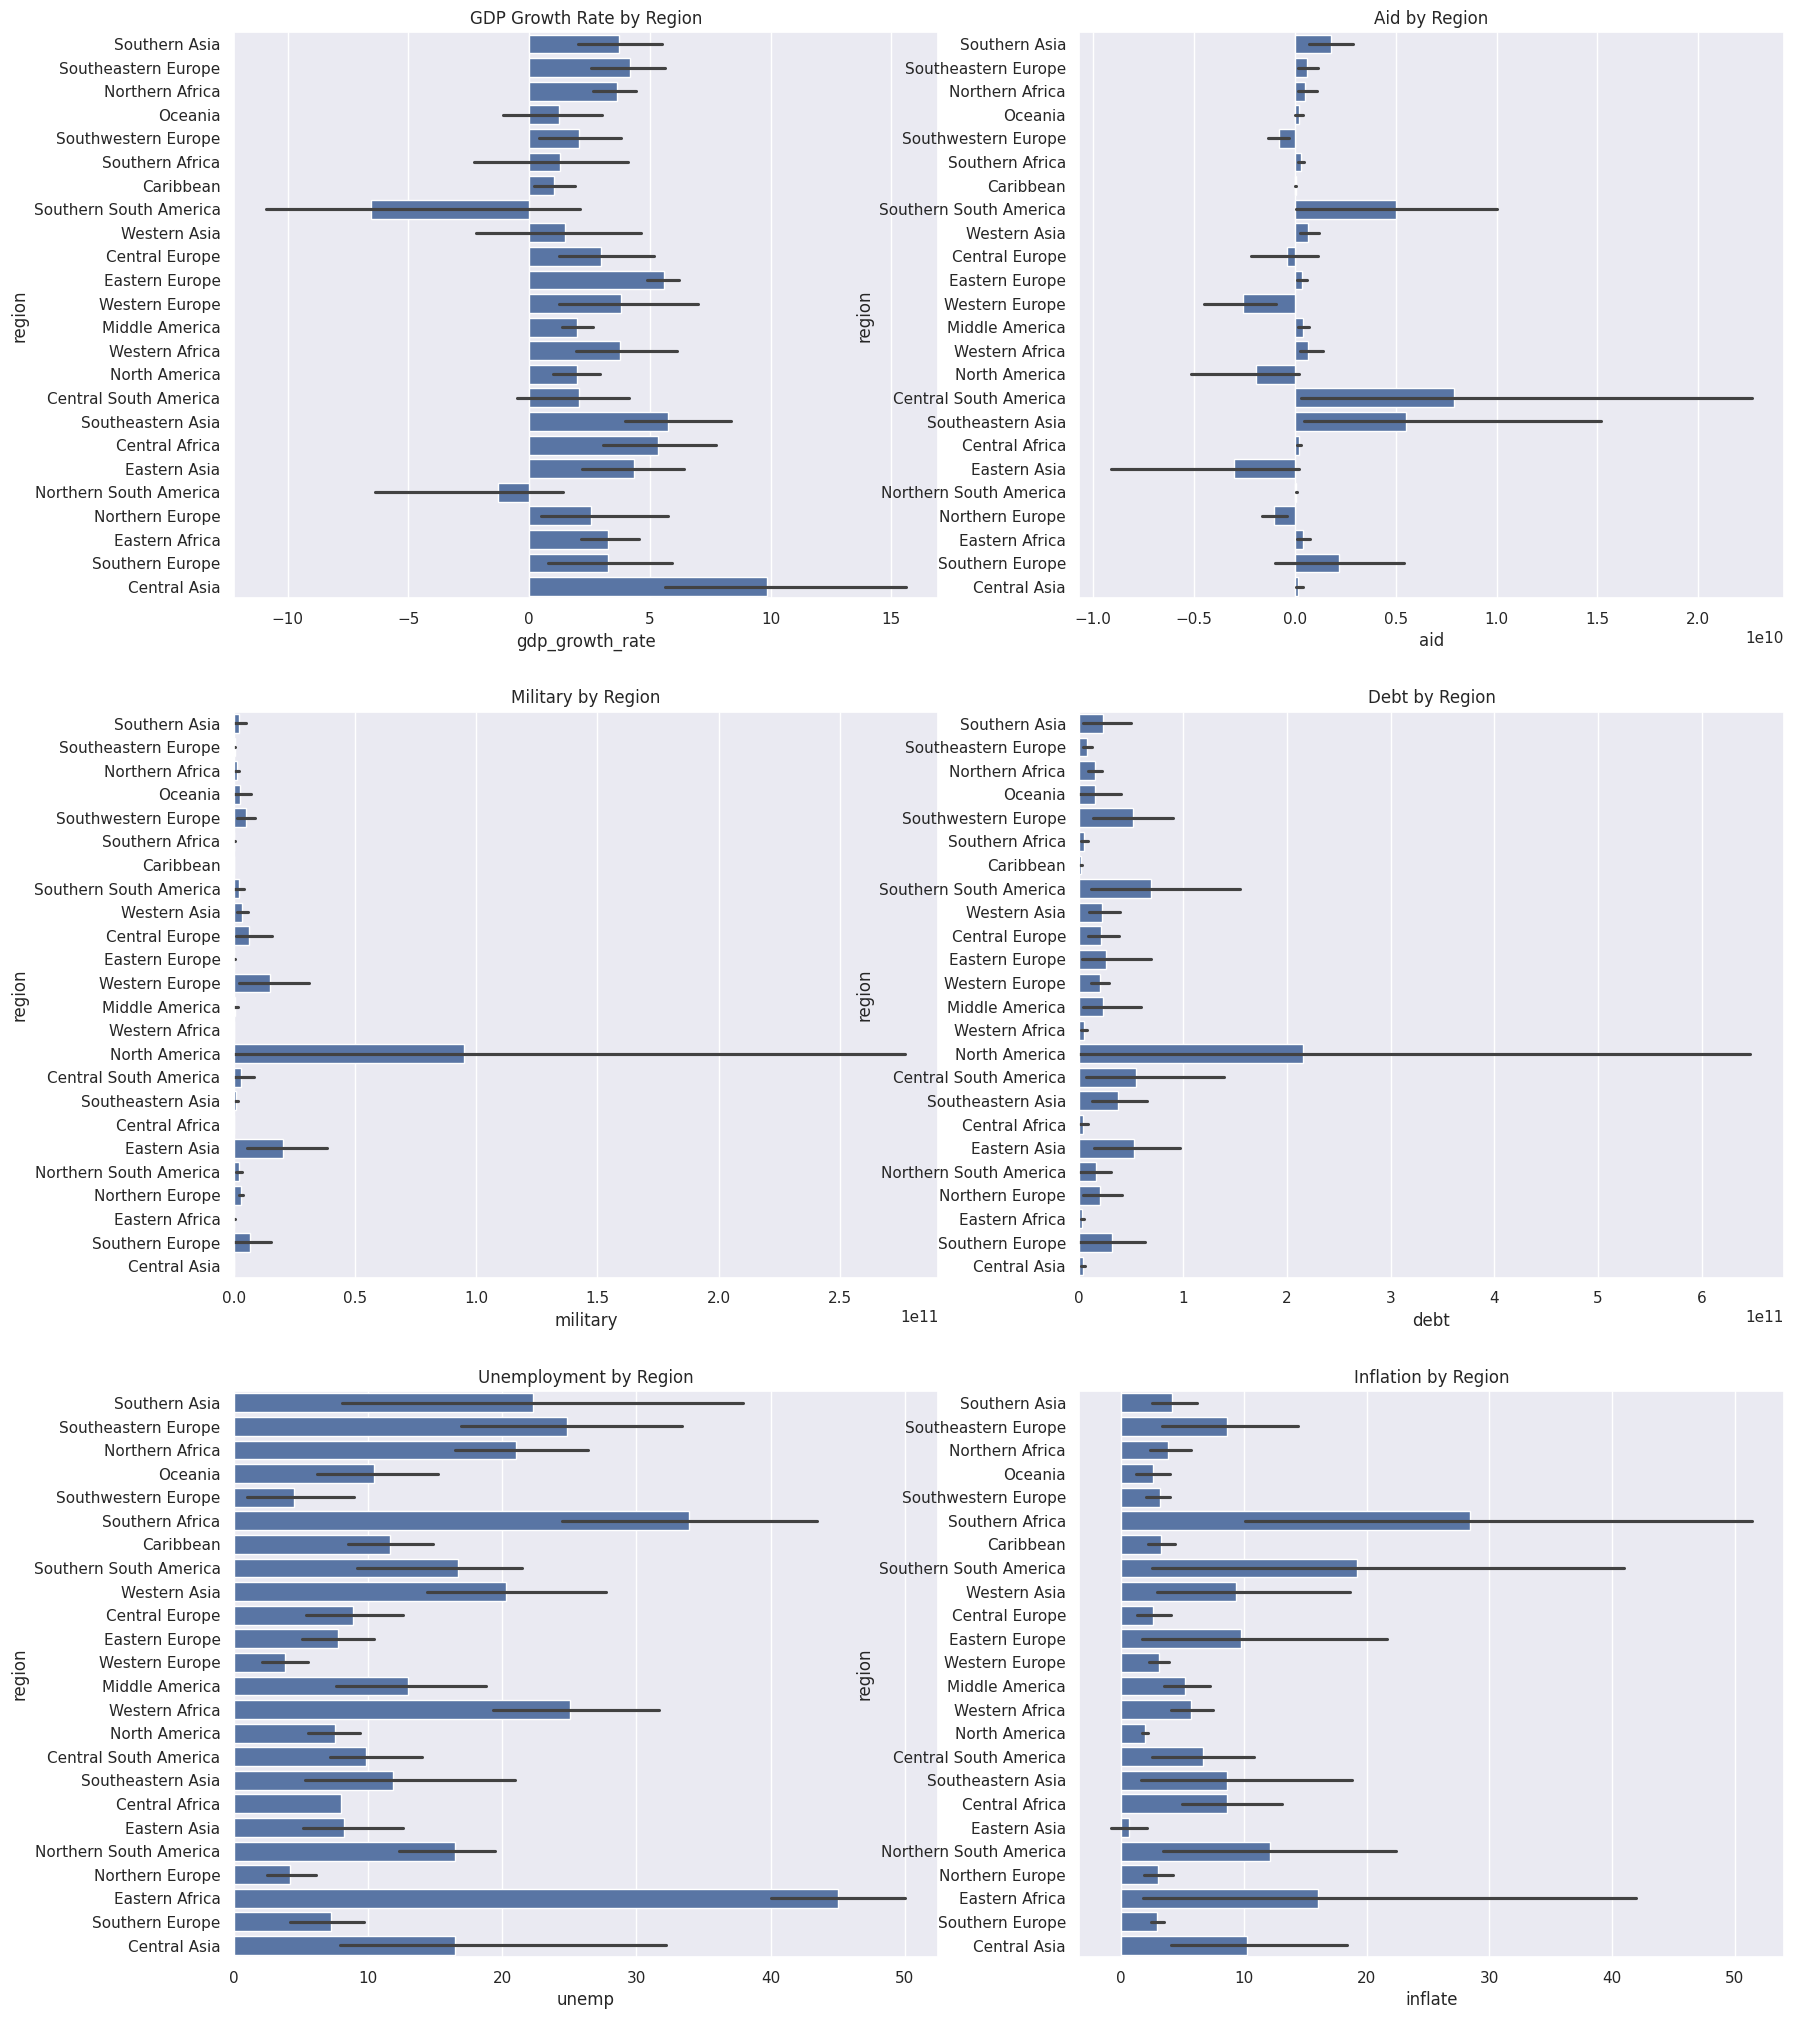

In [ ]:
_, ax = plt.subplots(3, 2, figsize=(20,25))
sns.barplot(data=df, x="gdp_growth_rate", y="region", ax=ax[0,0])
ax[0,0].set_title('GDP Growth Rate by Region')
sns.barplot(data=df, x="aid", y="region", ax=ax[0,1])
ax[0,1].set_title('Aid by Region')
sns.barplot(data=df, x="military", y="region", ax=ax[1,0])
ax[1,0].set_title('Military by Region')
sns.barplot(data=df, x="debt", y="region", ax=ax[1,1])
ax[1,1].set_title('Debt by Region')
sns.barplot(data=df, x='unemp', y='region', ax=ax[2,0])
ax[2,0].set_title('Unemployment by Region')
sns.barplot(data=df, x='inflate', y='region', ax=ax[2,1])
ax[2,1].set_title('Inflation by Region')

Видим, что признаки неравномерно распределены по регионам, заменим пропущенные значения средними по региону

In [ ]:
for index, row in df[df['gdp_growth_rate'].isnull()].iterrows():
  df.at[index, 'gdp_growth_rate'] = df[df['region'] == row['region']]['gdp_growth_rate'].mean()
for index, row in df[df['aid'].isnull()].iterrows():
  df.at[index, 'aid'] = df[df['region'] == row['region']]['aid'].mean()
for index, row in df[df['military'].isnull()].iterrows():
  df.at[index, 'military'] = df[df['region'] == row['region']]['military'].mean()
for index, row in df[df['debt'].isnull()].iterrows():
  df.at[index, 'debt'] = df[df['region'] == row['region']]['debt'].mean()
for index, row in df[df['unemp'].isnull()].iterrows():
  df.at[index, 'unemp'] = df[df['region'] == row['region']]['unemp'].mean()
for index, row in df[df['inflate'].isnull()].iterrows():
  df.at[index, 'inflate'] = df[df['region'] == row['region']]['inflate'].mean()
df['aid_category'] = pd.qcut(df['aid'], 5)
df['aid_category'] = df['aid_category'].cat.rename_categories({0, 1, 2, 3, 4})
df['military_category'] = pd.qcut(df['military'], 5)
df['military_category'] = df['military_category'].cat.rename_categories({0, 1, 2, 3, 4})
df['debt_category'] = pd.qcut(df['debt'], 5)
df['debt_category'] = df['debt_category'].cat.rename_categories({0, 1, 2, 3, 4})

In [ ]:
for index, row in df[df['iq'].isnull()].iterrows():
  df.at[index, 'iq'] = df[df['region'] == row['region']]['iq'].mean()
  df.at[index, 'measured'] = 'No'

Проанализируем уровень свободы

<Axes: xlabel='FH-free', ylabel='iq'>

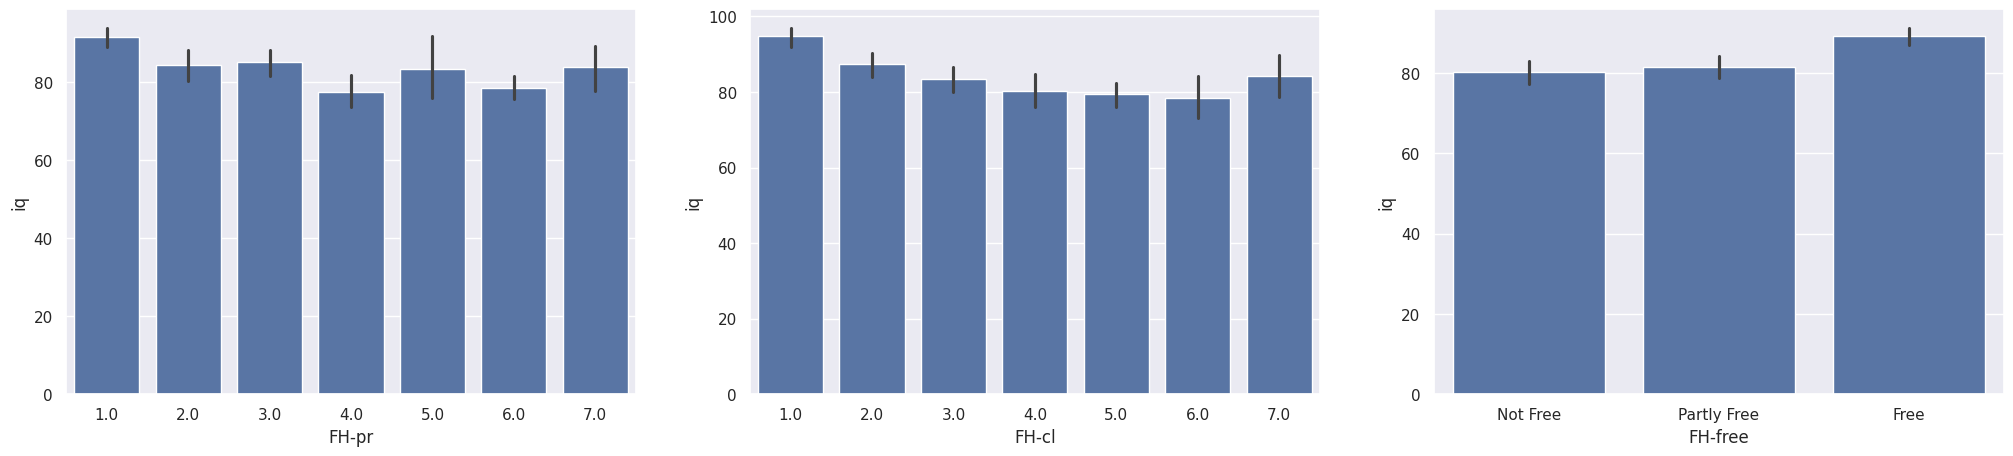

In [ ]:
_, ax = plt.subplots(1, 3, figsize=(25,5))
sns.barplot(data=df, x="FH-pr", y="iq", ax=ax[0])
sns.barplot(data=df, x="FH-cl", y="iq", ax=ax[1])
sns.barplot(data=df, x="FH-free", y="iq", ax=ax[2])



*   В наиболее свободных странах IQ немного выше


Проанализируем экономические характеристики

In [ ]:
df["EF-category"].describe()

,EF-category
count,152
unique,4
top,Mostly Unfree
freq,70


Делаем EF-category категориальным признаком

In [ ]:
df["EF-category"] = df['EF-category'].astype('category')

In [ ]:
df["EF-category"] = df["EF-category"].cat.rename_categories({'Free': 1, 'Mostly Free': 2, 'Mostly Unfree': 3, 'Repressed': 4})

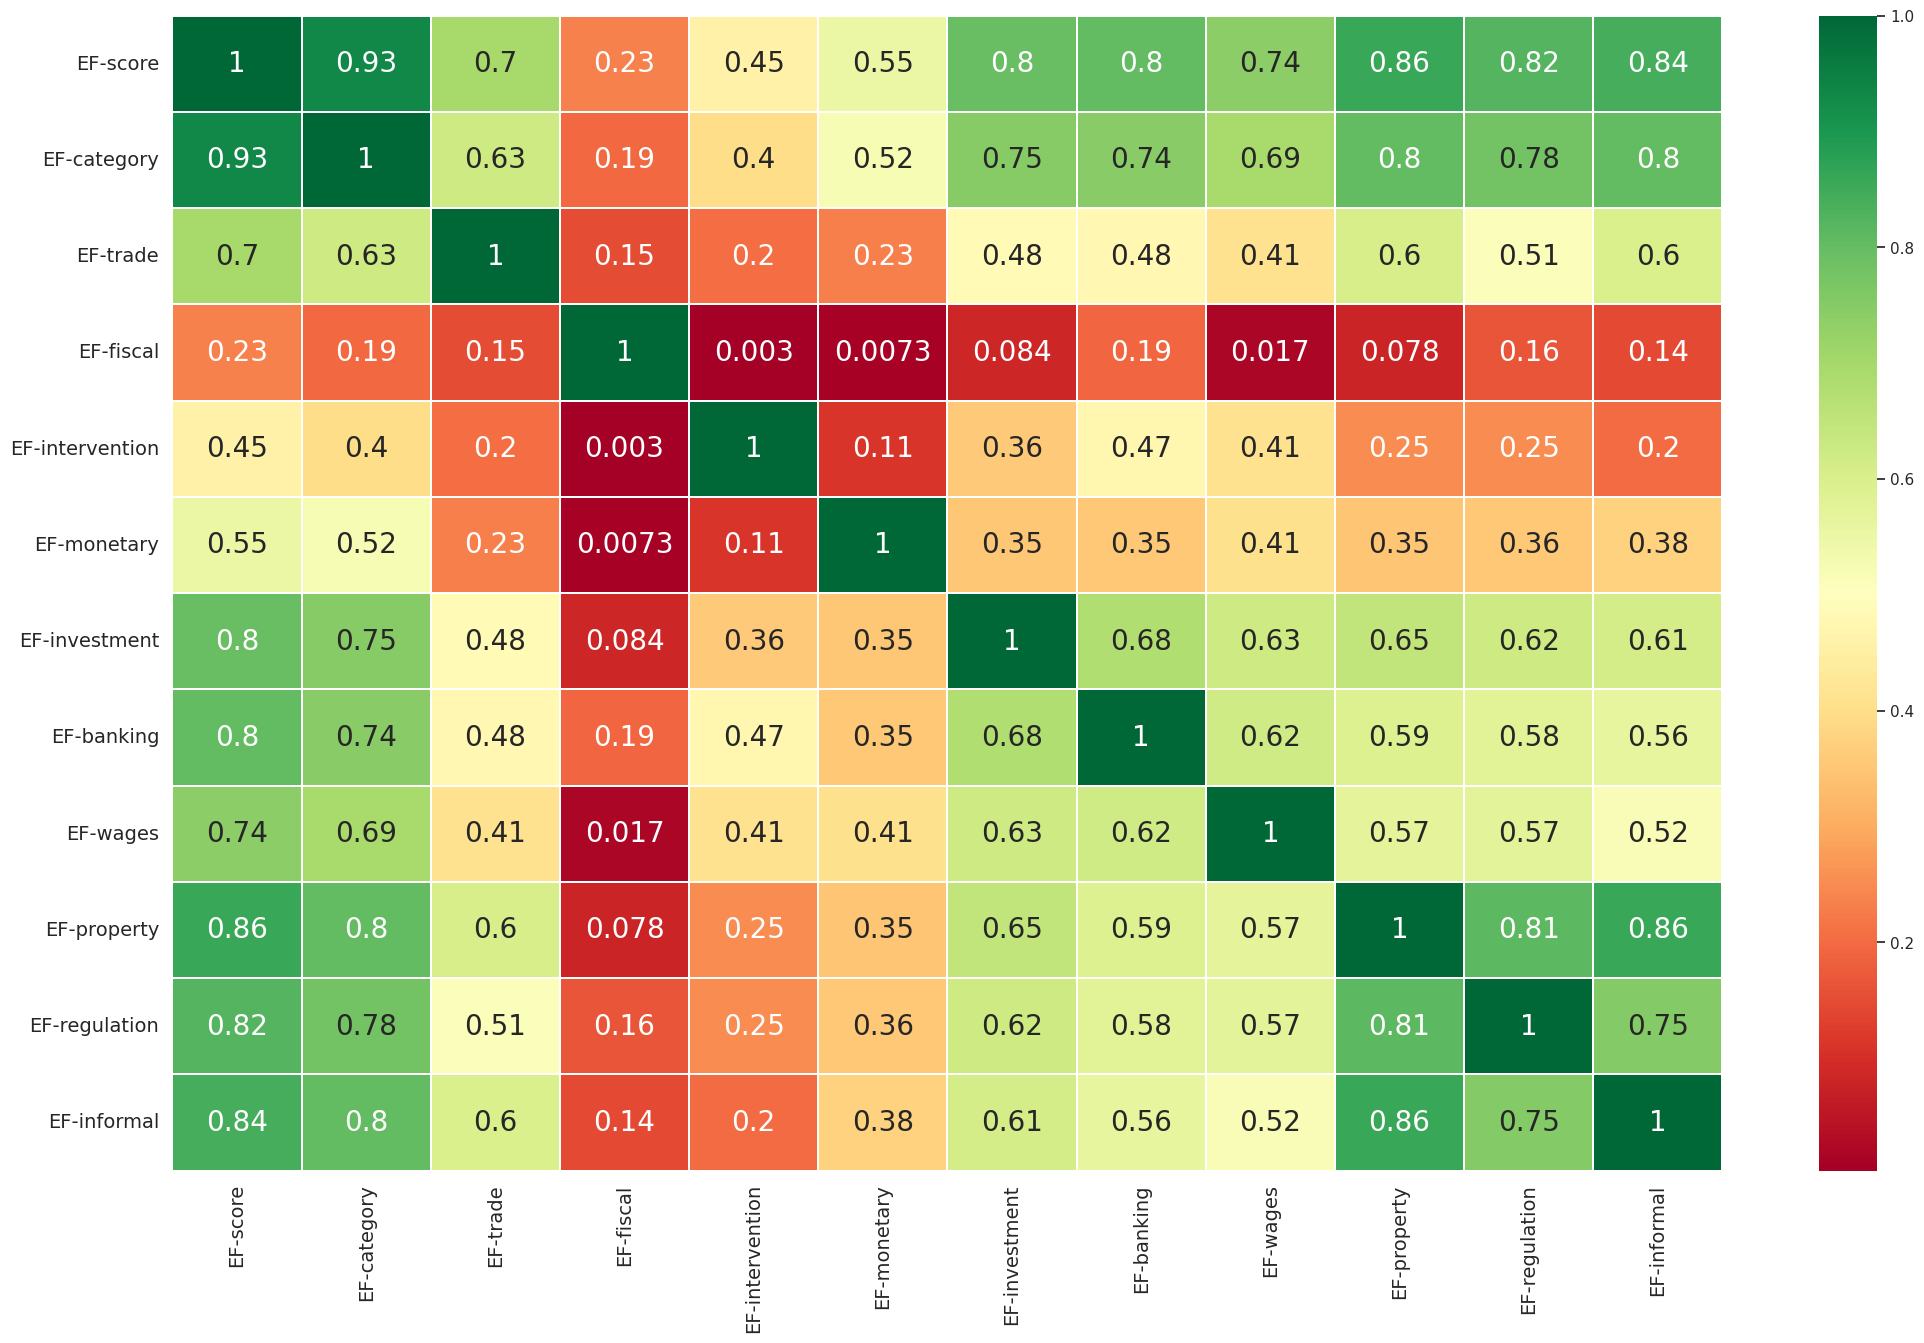

In [ ]:
sns.heatmap(df[['EF-score', 'EF-category', 'EF-trade','EF-fiscal', 'EF-intervention', 'EF-monetary', 'EF-investment', 'EF-banking', 'EF-wages', 'EF-property', 'EF-regulation', 'EF-informal']].corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(25, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Удалим признаки, имеющие сильную корреляцию с EF-score

In [ ]:
df.drop(['EF-category', 'EF-trade', 'EF-investment', 'EF-banking', 'EF-wages', 'EF-property', 'EF-regulation', 'EF-informal'], axis=1, inplace=True)

<Axes: xlabel='EF-monetary', ylabel='iq'>

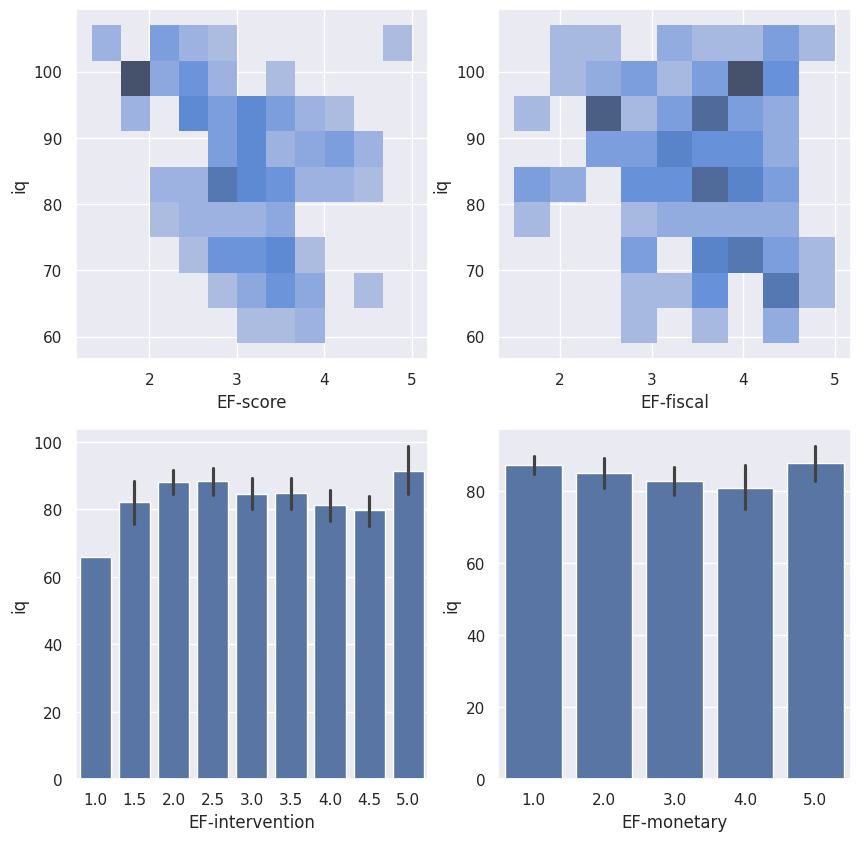

In [ ]:
_, ax = plt.subplots(2, 2, figsize=(10,10))
sns.histplot(data=df, x="EF-score", y="iq",ax=ax[0,0])
sns.histplot(data=df, x="EF-fiscal", y="iq", ax=ax[0,1])
sns.barplot(data=df, x="EF-intervention", y="iq", ax=ax[1,0])
sns.barplot(data=df, x="EF-monetary", y="iq", ax=ax[1,1])

*   Высокая экономическая свобода $-$ высокий IQ
*   Низкое государственное вмешательство $-$ низкий IQ
*   Монетарная политика и фискальное бремя не влияют



Удалим ненужные признаки

In [ ]:
df.drop(['population', 'name', 'gdp', 'measured', 'region', 'aid', 'military', 'debt'], axis=1, inplace=True)

Преобразуем категориальные признаки в количественные

In [ ]:
df['FH-free']=df['FH-free'].astype('category').cat.codes

Построим матрицу корреляции

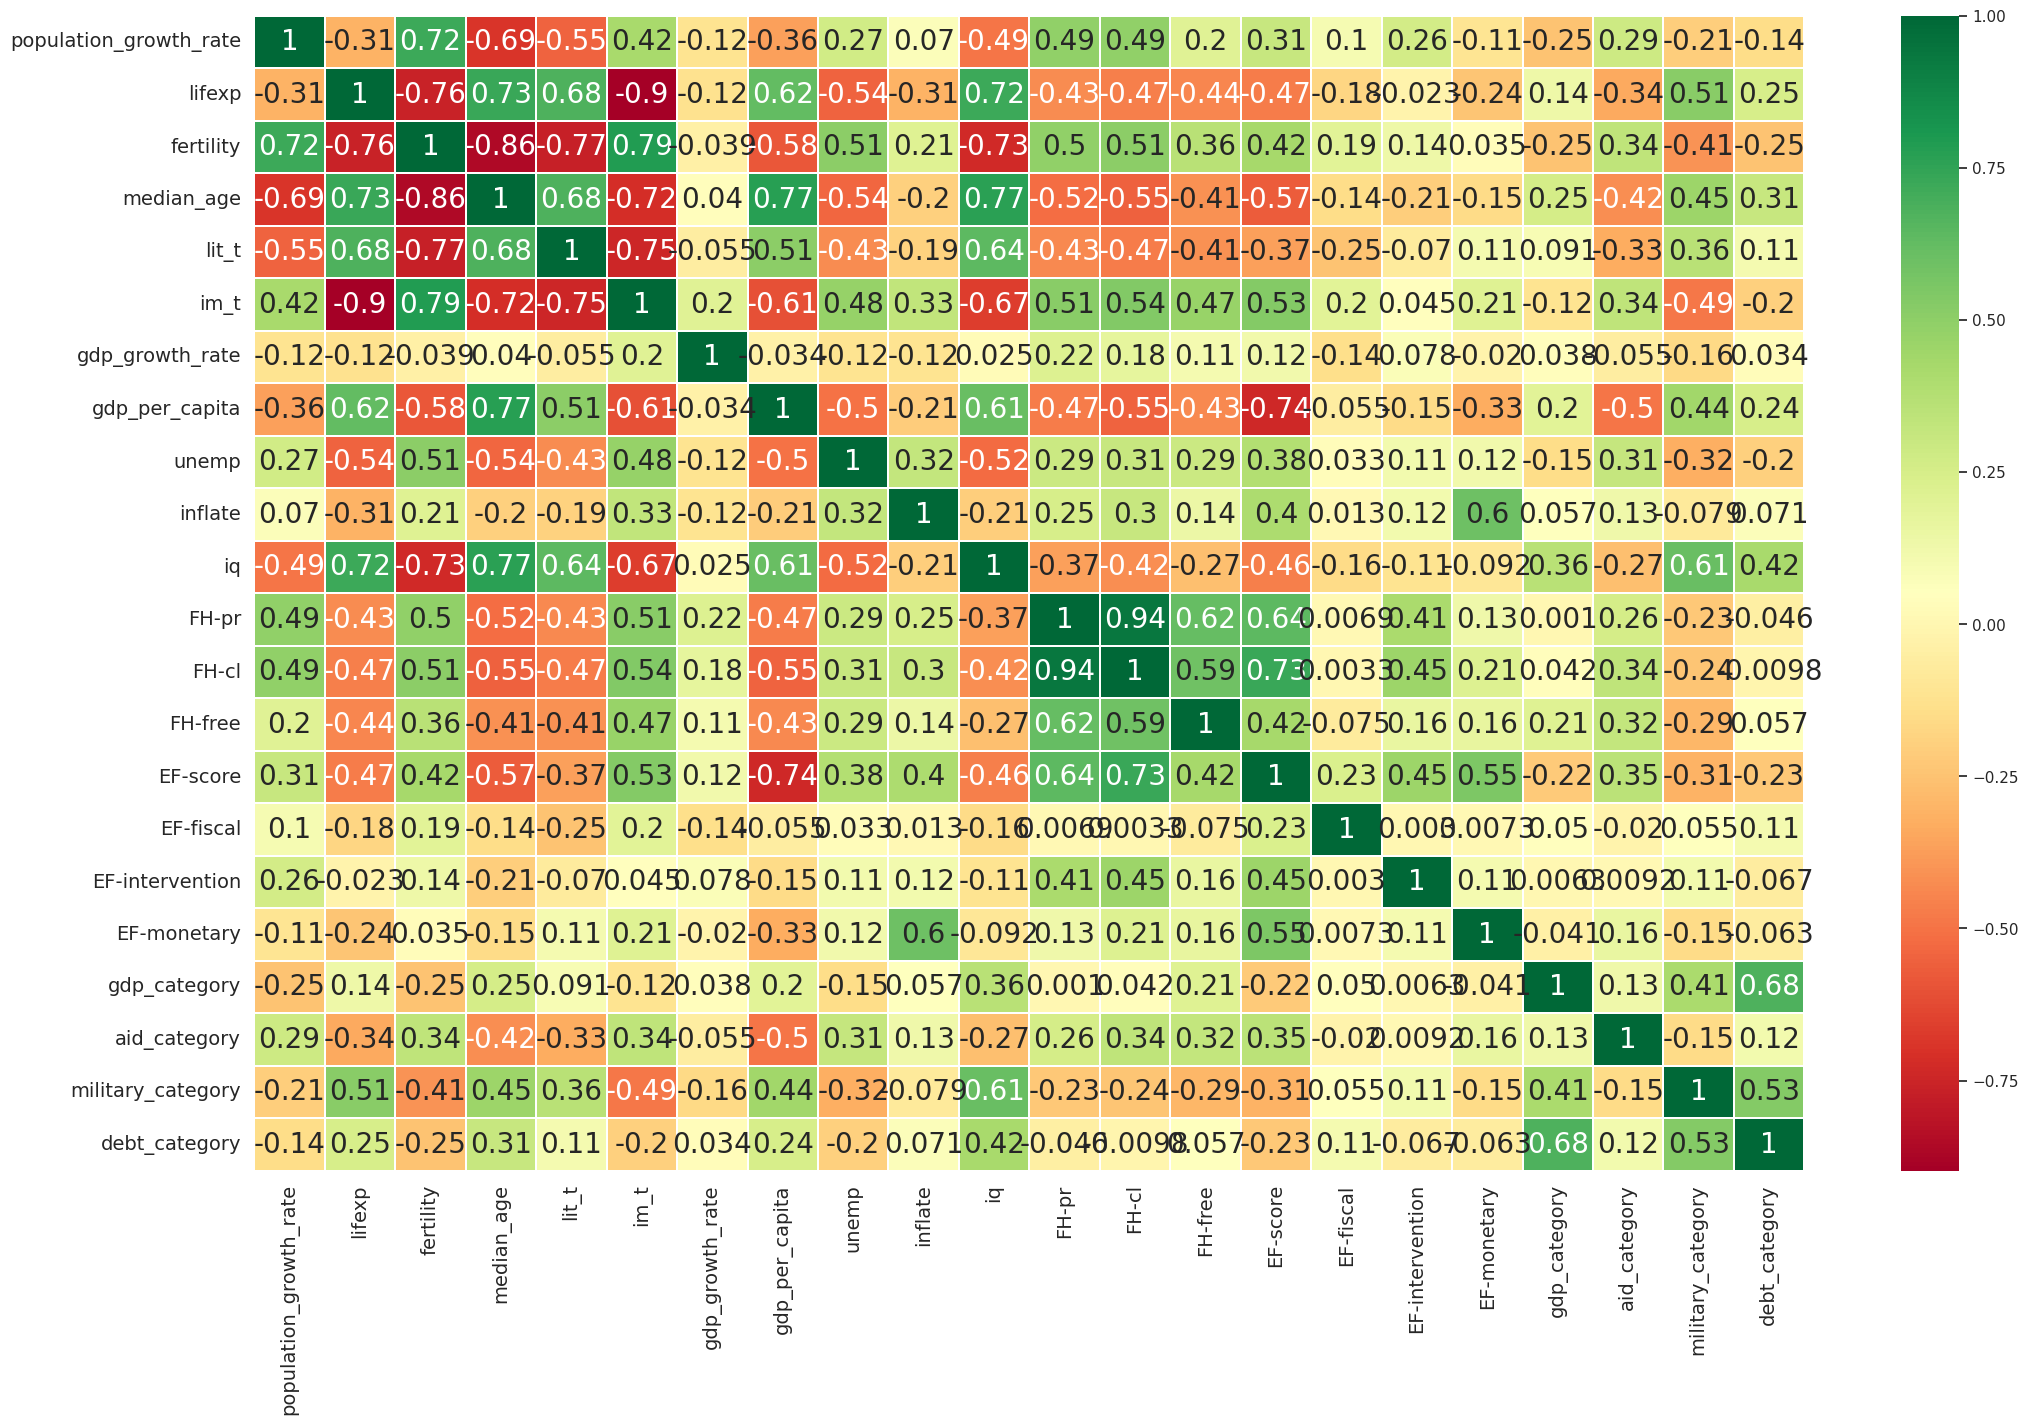

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(25, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()